[paper with code](https://paperswithcode.com/sota/image-classification-on-mnist?metric=Accuracy) 并没有纯CNN 方法，
不如考虑对比LeNet,AlexNet,VGG,ResNet等方法。 
Ref to [https://zh.d2l.ai/chapter_convolutional-modern/index.html](https://zh.d2l.ai/chapter_convolutional-modern/index.html)

目前主流的对比数据集是 3 个：[Binary Connect](https://arxiv.org/pdf/1511.00363) 和 [	
ReNet](https://arxiv.org/pdf/1505.00393v3)

# MedMnist
[]()

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from os.path import join
from config.config import load_config28

In [3]:
dataset_name = "vesselmnist3d"
config = load_config28(dataset_name)

In [4]:
ORDER = config["order"]
SIZE = config["data"]["size"]
TASK = config["task"]
NUM_CLASSES = config["network"]["num_classes"]
EPOCHS = config["train"]["epochs"]
BATCH_SIZE = config["data"]["batch_size"]
INPUT_CHANNEL = config["network"]["input_channels"]
LINEAR_SIZE = config["network"]["linear_size"]
CRITERION = config["train"]["criterion"]
DEVICE = config["train"]["device"]
experiment_name = f"{ORDER}-{dataset_name}-{SIZE}"

In [5]:
checkpoint_save_dir = join(config["train"]["checkpoint_save_dir"], experiment_name)

In [6]:
from data_load import get_dataloader

train_loader, test_loader = get_dataloader(
    dataset_name, BATCH_SIZE, SIZE, TASK, shape_transform=True
)

Using downloaded and verified file: /home/limingbo/.medmnist/vesselmnist3d.npz
Using downloaded and verified file: /home/limingbo/.medmnist/vesselmnist3d.npz


In [7]:
from tcnn.utils.experiment.model import (
    get_optimizers_dict_medmnist,
    get_schedulers_dict_medmnist,
)
import lenet_models
import lenet_models_binary

if TASK == "multiclass":
    model_dict = lenet_models.get_model_dict(INPUT_CHANNEL, NUM_CLASSES, LINEAR_SIZE)
    print("Loaded multiclass model with {} classes".format(NUM_CLASSES))
elif TASK == "binary":
    model_dict = lenet_models_binary.get_model_dict(INPUT_CHANNEL, LINEAR_SIZE)
    print("Loaded binary model")

optimizers_dict = get_optimizers_dict_medmnist(model_dict)
schedulers_dict = get_schedulers_dict_medmnist(optimizers_dict)

Loaded binary model


In [8]:
history_dict = {}

In [9]:
from tcnn.utils.experiment.train import train_and_test_model

for model_name, model in model_dict.items():
    print(f"Training model {model_name}")
    history_dict[model_name] = train_and_test_model(
        model,
        train_loader,
        test_loader,
        CRITERION,
        optimizers_dict[model_name],
        scheduler=schedulers_dict[model_name],
        epochs=EPOCHS,
        save_checkpoint=True,
        save_checkpoint_interval=1,
        checkpoint_save_dir=join(checkpoint_save_dir, model_name),
        task=TASK,
    )
    print("***" * 10)

Training model cptcnn1
Checkpoints will be saved in checkpoints/05-vesselmnist3d-28/cptcnn1
No checkpoints found
Training on cuda and 1 GPUs:
Device 0: NVIDIA GeForce RTX 4090
Model parameters: 275891(0.26311MB)
Start training from epoch 0 to 100


  1%|          | 1/100 [00:04<06:54,  4.19s/it]

saved best checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cptcnn1
Epoch: 0 Train accuracy: 86.66667%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cptcnn1


  2%|▏         | 2/100 [00:08<06:45,  4.14s/it]

Epoch: 1 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 1 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 0 from checkpoints/05-vesselmnist3d-28/cptcnn1


  3%|▎         | 3/100 [00:12<06:40,  4.13s/it]

Epoch: 2 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 2 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 1 from checkpoints/05-vesselmnist3d-28/cptcnn1


  4%|▍         | 4/100 [00:16<06:35,  4.12s/it]

Epoch: 3 Train accuracy: 88.38951%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 3 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 2 from checkpoints/05-vesselmnist3d-28/cptcnn1


  5%|▌         | 5/100 [00:20<06:30,  4.11s/it]

Epoch: 4 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 4 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 3 from checkpoints/05-vesselmnist3d-28/cptcnn1


  6%|▌         | 6/100 [00:24<06:26,  4.11s/it]

Epoch: 5 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 5 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 4 from checkpoints/05-vesselmnist3d-28/cptcnn1


  7%|▋         | 7/100 [00:28<06:22,  4.11s/it]

Epoch: 6 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 6 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 5 from checkpoints/05-vesselmnist3d-28/cptcnn1


  8%|▊         | 8/100 [00:32<06:18,  4.11s/it]

Epoch: 7 Train accuracy: 88.38951%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 7 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 6 from checkpoints/05-vesselmnist3d-28/cptcnn1


  9%|▉         | 9/100 [00:37<06:13,  4.11s/it]

Epoch: 8 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 8 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 7 from checkpoints/05-vesselmnist3d-28/cptcnn1


 10%|█         | 10/100 [00:41<06:09,  4.11s/it]

Epoch: 9 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 9 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 8 from checkpoints/05-vesselmnist3d-28/cptcnn1


 11%|█         | 11/100 [00:45<06:05,  4.11s/it]

Epoch: 10 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 10 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 9 from checkpoints/05-vesselmnist3d-28/cptcnn1


 12%|█▏        | 12/100 [00:49<06:01,  4.11s/it]

Epoch: 11 Train accuracy: 88.23970%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 11 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 10 from checkpoints/05-vesselmnist3d-28/cptcnn1


 13%|█▎        | 13/100 [00:53<05:57,  4.11s/it]

Epoch: 12 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 12 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 11 from checkpoints/05-vesselmnist3d-28/cptcnn1


 14%|█▍        | 14/100 [00:57<05:53,  4.11s/it]

Epoch: 13 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 13 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 12 from checkpoints/05-vesselmnist3d-28/cptcnn1


 15%|█▌        | 15/100 [01:01<05:48,  4.11s/it]

Epoch: 14 Train accuracy: 88.38951%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 14 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 13 from checkpoints/05-vesselmnist3d-28/cptcnn1


 16%|█▌        | 16/100 [01:05<05:44,  4.11s/it]

Epoch: 15 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 15 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 14 from checkpoints/05-vesselmnist3d-28/cptcnn1


 17%|█▋        | 17/100 [01:09<05:40,  4.11s/it]

Epoch: 16 Train accuracy: 88.91386%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 16 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 15 from checkpoints/05-vesselmnist3d-28/cptcnn1


 18%|█▊        | 18/100 [01:13<05:36,  4.11s/it]

Epoch: 17 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 17 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 16 from checkpoints/05-vesselmnist3d-28/cptcnn1


 19%|█▉        | 19/100 [01:18<05:32,  4.11s/it]

Epoch: 18 Train accuracy: 88.38951%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 18 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 17 from checkpoints/05-vesselmnist3d-28/cptcnn1


 20%|██        | 20/100 [01:22<05:28,  4.11s/it]

Epoch: 19 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 19 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 18 from checkpoints/05-vesselmnist3d-28/cptcnn1


 21%|██        | 21/100 [01:26<05:24,  4.10s/it]

Epoch: 20 Train accuracy: 88.91386%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 20 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 19 from checkpoints/05-vesselmnist3d-28/cptcnn1


 22%|██▏       | 22/100 [01:30<05:20,  4.11s/it]

Epoch: 21 Train accuracy: 88.91386%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 21 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 20 from checkpoints/05-vesselmnist3d-28/cptcnn1


 23%|██▎       | 23/100 [01:34<05:16,  4.11s/it]

Epoch: 22 Train accuracy: 88.38951%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 22 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 21 from checkpoints/05-vesselmnist3d-28/cptcnn1


 24%|██▍       | 24/100 [01:38<05:12,  4.11s/it]

Epoch: 23 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 23 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 22 from checkpoints/05-vesselmnist3d-28/cptcnn1


 25%|██▌       | 25/100 [01:42<05:07,  4.11s/it]

Epoch: 24 Train accuracy: 88.53933%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 24 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 23 from checkpoints/05-vesselmnist3d-28/cptcnn1


 26%|██▌       | 26/100 [01:46<05:03,  4.11s/it]

Epoch: 25 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 25 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 24 from checkpoints/05-vesselmnist3d-28/cptcnn1


 27%|██▋       | 27/100 [01:50<04:59,  4.11s/it]

Epoch: 26 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 26 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 25 from checkpoints/05-vesselmnist3d-28/cptcnn1


 28%|██▊       | 28/100 [01:55<04:55,  4.11s/it]

Epoch: 27 Train accuracy: 88.91386%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 27 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 26 from checkpoints/05-vesselmnist3d-28/cptcnn1


 29%|██▉       | 29/100 [01:59<04:51,  4.11s/it]

Epoch: 28 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 28 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 27 from checkpoints/05-vesselmnist3d-28/cptcnn1


 30%|███       | 30/100 [02:03<04:47,  4.11s/it]

Epoch: 29 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 29 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 28 from checkpoints/05-vesselmnist3d-28/cptcnn1


 31%|███       | 31/100 [02:07<04:43,  4.11s/it]

Epoch: 30 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 30 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 29 from checkpoints/05-vesselmnist3d-28/cptcnn1


 32%|███▏      | 32/100 [02:11<04:39,  4.11s/it]

Epoch: 31 Train accuracy: 89.28839%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 31 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 30 from checkpoints/05-vesselmnist3d-28/cptcnn1


 33%|███▎      | 33/100 [02:15<04:35,  4.11s/it]

Epoch: 32 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 32 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 31 from checkpoints/05-vesselmnist3d-28/cptcnn1


 34%|███▍      | 34/100 [02:19<04:31,  4.11s/it]

Epoch: 33 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 33 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 32 from checkpoints/05-vesselmnist3d-28/cptcnn1


 35%|███▌      | 35/100 [02:23<04:27,  4.11s/it]

Epoch: 34 Train accuracy: 88.91386%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 34 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 33 from checkpoints/05-vesselmnist3d-28/cptcnn1


 36%|███▌      | 36/100 [02:27<04:22,  4.11s/it]

Epoch: 35 Train accuracy: 88.46442%  Test accuracy: 88.21990%  Best accuracy: 88.74346%
Saved checkpoint at epoch 35 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 34 from checkpoints/05-vesselmnist3d-28/cptcnn1


 37%|███▋      | 37/100 [02:32<04:18,  4.11s/it]

Epoch: 36 Train accuracy: 88.83895%  Test accuracy: 88.48168%  Best accuracy: 88.74346%
Saved checkpoint at epoch 36 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 35 from checkpoints/05-vesselmnist3d-28/cptcnn1


 38%|███▊      | 38/100 [02:36<04:14,  4.11s/it]

Epoch: 37 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 37 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 36 from checkpoints/05-vesselmnist3d-28/cptcnn1


 39%|███▉      | 39/100 [02:40<04:10,  4.11s/it]

Epoch: 38 Train accuracy: 88.91386%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 38 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 37 from checkpoints/05-vesselmnist3d-28/cptcnn1


 40%|████      | 40/100 [02:44<04:06,  4.11s/it]

Epoch: 39 Train accuracy: 89.28839%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 39 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 38 from checkpoints/05-vesselmnist3d-28/cptcnn1


 41%|████      | 41/100 [02:48<04:02,  4.11s/it]

Epoch: 40 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 40 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 39 from checkpoints/05-vesselmnist3d-28/cptcnn1


 42%|████▏     | 42/100 [02:52<03:58,  4.10s/it]

Epoch: 41 Train accuracy: 88.98876%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 41 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 40 from checkpoints/05-vesselmnist3d-28/cptcnn1


 43%|████▎     | 43/100 [02:56<03:54,  4.11s/it]

Epoch: 42 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 42 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 41 from checkpoints/05-vesselmnist3d-28/cptcnn1


 44%|████▍     | 44/100 [03:00<03:49,  4.11s/it]

Epoch: 43 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 43 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 42 from checkpoints/05-vesselmnist3d-28/cptcnn1


 45%|████▌     | 45/100 [03:04<03:45,  4.11s/it]

Epoch: 44 Train accuracy: 89.06367%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 44 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 43 from checkpoints/05-vesselmnist3d-28/cptcnn1


 46%|████▌     | 46/100 [03:08<03:41,  4.11s/it]

saved best checkpoint at epoch 45 to checkpoints/05-vesselmnist3d-28/cptcnn1
Epoch: 45 Train accuracy: 88.98876%  Test accuracy: 89.00524%  Best accuracy: 89.00524%
Saved checkpoint at epoch 45 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 44 from checkpoints/05-vesselmnist3d-28/cptcnn1


 47%|████▋     | 47/100 [03:13<03:37,  4.11s/it]

Epoch: 46 Train accuracy: 89.13858%  Test accuracy: 88.74346%  Best accuracy: 89.00524%
Saved checkpoint at epoch 46 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 45 from checkpoints/05-vesselmnist3d-28/cptcnn1


 48%|████▊     | 48/100 [03:17<03:33,  4.11s/it]

Epoch: 47 Train accuracy: 89.28839%  Test accuracy: 89.00524%  Best accuracy: 89.00524%
Saved checkpoint at epoch 47 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 46 from checkpoints/05-vesselmnist3d-28/cptcnn1


 49%|████▉     | 49/100 [03:21<03:29,  4.11s/it]

saved best checkpoint at epoch 48 to checkpoints/05-vesselmnist3d-28/cptcnn1
Epoch: 48 Train accuracy: 90.18727%  Test accuracy: 89.26702%  Best accuracy: 89.26702%
Saved checkpoint at epoch 48 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 47 from checkpoints/05-vesselmnist3d-28/cptcnn1


 50%|█████     | 50/100 [03:25<03:25,  4.11s/it]

saved best checkpoint at epoch 49 to checkpoints/05-vesselmnist3d-28/cptcnn1
Epoch: 49 Train accuracy: 88.76404%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 49 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 48 from checkpoints/05-vesselmnist3d-28/cptcnn1


 51%|█████     | 51/100 [03:29<03:21,  4.11s/it]

Epoch: 50 Train accuracy: 89.66292%  Test accuracy: 89.00524%  Best accuracy: 89.52880%
Saved checkpoint at epoch 50 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 49 from checkpoints/05-vesselmnist3d-28/cptcnn1


 52%|█████▏    | 52/100 [03:33<03:17,  4.11s/it]

Epoch: 51 Train accuracy: 90.48689%  Test accuracy: 89.00524%  Best accuracy: 89.52880%
Saved checkpoint at epoch 51 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 50 from checkpoints/05-vesselmnist3d-28/cptcnn1


 53%|█████▎    | 53/100 [03:37<03:13,  4.11s/it]

Epoch: 52 Train accuracy: 90.33708%  Test accuracy: 89.00524%  Best accuracy: 89.52880%
Saved checkpoint at epoch 52 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 51 from checkpoints/05-vesselmnist3d-28/cptcnn1


 54%|█████▍    | 54/100 [03:41<03:08,  4.11s/it]

Epoch: 53 Train accuracy: 90.33708%  Test accuracy: 89.26702%  Best accuracy: 89.52880%
Saved checkpoint at epoch 53 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 52 from checkpoints/05-vesselmnist3d-28/cptcnn1


 55%|█████▌    | 55/100 [03:45<03:04,  4.10s/it]

Epoch: 54 Train accuracy: 90.56180%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 54 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 53 from checkpoints/05-vesselmnist3d-28/cptcnn1


 56%|█████▌    | 56/100 [03:50<03:00,  4.10s/it]

Epoch: 55 Train accuracy: 89.88764%  Test accuracy: 88.21990%  Best accuracy: 89.52880%
Saved checkpoint at epoch 55 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 54 from checkpoints/05-vesselmnist3d-28/cptcnn1


 57%|█████▋    | 57/100 [03:54<02:56,  4.10s/it]

Epoch: 56 Train accuracy: 90.41199%  Test accuracy: 89.00524%  Best accuracy: 89.52880%
Saved checkpoint at epoch 56 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 55 from checkpoints/05-vesselmnist3d-28/cptcnn1


 58%|█████▊    | 58/100 [03:58<02:52,  4.10s/it]

Epoch: 57 Train accuracy: 90.41199%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 57 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 56 from checkpoints/05-vesselmnist3d-28/cptcnn1


 59%|█████▉    | 59/100 [04:02<02:48,  4.11s/it]

Epoch: 58 Train accuracy: 90.63670%  Test accuracy: 89.26702%  Best accuracy: 89.52880%
Saved checkpoint at epoch 58 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 57 from checkpoints/05-vesselmnist3d-28/cptcnn1


 60%|██████    | 60/100 [04:06<02:44,  4.11s/it]

Epoch: 59 Train accuracy: 90.56180%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 59 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 58 from checkpoints/05-vesselmnist3d-28/cptcnn1


 61%|██████    | 61/100 [04:10<02:40,  4.11s/it]

Epoch: 60 Train accuracy: 90.41199%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 60 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 59 from checkpoints/05-vesselmnist3d-28/cptcnn1


 62%|██████▏   | 62/100 [04:14<02:36,  4.11s/it]

Epoch: 61 Train accuracy: 90.56180%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 61 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 60 from checkpoints/05-vesselmnist3d-28/cptcnn1


 63%|██████▎   | 63/100 [04:18<02:31,  4.11s/it]

Epoch: 62 Train accuracy: 90.33708%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 62 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 61 from checkpoints/05-vesselmnist3d-28/cptcnn1


 64%|██████▍   | 64/100 [04:22<02:27,  4.11s/it]

Epoch: 63 Train accuracy: 90.93633%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 63 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 62 from checkpoints/05-vesselmnist3d-28/cptcnn1


 65%|██████▌   | 65/100 [04:27<02:23,  4.11s/it]

Epoch: 64 Train accuracy: 90.71161%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 64 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 63 from checkpoints/05-vesselmnist3d-28/cptcnn1


 66%|██████▌   | 66/100 [04:31<02:19,  4.11s/it]

Epoch: 65 Train accuracy: 91.01124%  Test accuracy: 87.95812%  Best accuracy: 89.52880%
Saved checkpoint at epoch 65 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 64 from checkpoints/05-vesselmnist3d-28/cptcnn1


 67%|██████▋   | 67/100 [04:35<02:15,  4.11s/it]

Epoch: 66 Train accuracy: 90.26217%  Test accuracy: 88.21990%  Best accuracy: 89.52880%
Saved checkpoint at epoch 66 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 65 from checkpoints/05-vesselmnist3d-28/cptcnn1


 68%|██████▊   | 68/100 [04:39<02:11,  4.11s/it]

Epoch: 67 Train accuracy: 90.18727%  Test accuracy: 88.21990%  Best accuracy: 89.52880%
Saved checkpoint at epoch 67 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 66 from checkpoints/05-vesselmnist3d-28/cptcnn1


 69%|██████▉   | 69/100 [04:43<02:07,  4.11s/it]

Epoch: 68 Train accuracy: 90.86142%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 68 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 67 from checkpoints/05-vesselmnist3d-28/cptcnn1


 70%|███████   | 70/100 [04:47<02:03,  4.11s/it]

Epoch: 69 Train accuracy: 91.01124%  Test accuracy: 88.21990%  Best accuracy: 89.52880%
Saved checkpoint at epoch 69 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 68 from checkpoints/05-vesselmnist3d-28/cptcnn1


 71%|███████   | 71/100 [04:51<01:59,  4.11s/it]

Epoch: 70 Train accuracy: 90.63670%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 70 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 69 from checkpoints/05-vesselmnist3d-28/cptcnn1


 72%|███████▏  | 72/100 [04:55<01:55,  4.11s/it]

Epoch: 71 Train accuracy: 90.56180%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 71 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 70 from checkpoints/05-vesselmnist3d-28/cptcnn1


 73%|███████▎  | 73/100 [04:59<01:50,  4.11s/it]

Epoch: 72 Train accuracy: 91.16105%  Test accuracy: 89.26702%  Best accuracy: 89.52880%
Saved checkpoint at epoch 72 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 71 from checkpoints/05-vesselmnist3d-28/cptcnn1


 74%|███████▍  | 74/100 [05:03<01:46,  4.11s/it]

Epoch: 73 Train accuracy: 91.23596%  Test accuracy: 87.95812%  Best accuracy: 89.52880%
Saved checkpoint at epoch 73 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 72 from checkpoints/05-vesselmnist3d-28/cptcnn1


 75%|███████▌  | 75/100 [05:08<01:42,  4.11s/it]

Epoch: 74 Train accuracy: 90.93633%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 74 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 73 from checkpoints/05-vesselmnist3d-28/cptcnn1


 76%|███████▌  | 76/100 [05:12<01:38,  4.11s/it]

Epoch: 75 Train accuracy: 91.01124%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 75 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 74 from checkpoints/05-vesselmnist3d-28/cptcnn1


 77%|███████▋  | 77/100 [05:16<01:34,  4.11s/it]

Epoch: 76 Train accuracy: 90.86142%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 76 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 75 from checkpoints/05-vesselmnist3d-28/cptcnn1


 78%|███████▊  | 78/100 [05:20<01:30,  4.11s/it]

Epoch: 77 Train accuracy: 91.16105%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 77 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 76 from checkpoints/05-vesselmnist3d-28/cptcnn1


 79%|███████▉  | 79/100 [05:24<01:26,  4.11s/it]

Epoch: 78 Train accuracy: 91.08614%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 78 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 77 from checkpoints/05-vesselmnist3d-28/cptcnn1


 80%|████████  | 80/100 [05:28<01:22,  4.11s/it]

Epoch: 79 Train accuracy: 91.46067%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 79 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 78 from checkpoints/05-vesselmnist3d-28/cptcnn1


 81%|████████  | 81/100 [05:32<01:18,  4.11s/it]

Epoch: 80 Train accuracy: 91.31086%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 80 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 79 from checkpoints/05-vesselmnist3d-28/cptcnn1


 82%|████████▏ | 82/100 [05:36<01:13,  4.11s/it]

Epoch: 81 Train accuracy: 91.01124%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 81 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 80 from checkpoints/05-vesselmnist3d-28/cptcnn1


 83%|████████▎ | 83/100 [05:40<01:09,  4.11s/it]

Epoch: 82 Train accuracy: 90.63670%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 82 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 81 from checkpoints/05-vesselmnist3d-28/cptcnn1


 84%|████████▍ | 84/100 [05:45<01:05,  4.11s/it]

Epoch: 83 Train accuracy: 91.61049%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 83 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 82 from checkpoints/05-vesselmnist3d-28/cptcnn1


 85%|████████▌ | 85/100 [05:49<01:01,  4.11s/it]

Epoch: 84 Train accuracy: 91.91011%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 84 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 83 from checkpoints/05-vesselmnist3d-28/cptcnn1


 86%|████████▌ | 86/100 [05:53<00:57,  4.11s/it]

Epoch: 85 Train accuracy: 91.23596%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 85 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 84 from checkpoints/05-vesselmnist3d-28/cptcnn1


 87%|████████▋ | 87/100 [05:57<00:53,  4.11s/it]

Epoch: 86 Train accuracy: 90.86142%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 86 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 85 from checkpoints/05-vesselmnist3d-28/cptcnn1


 88%|████████▊ | 88/100 [06:01<00:49,  4.11s/it]

Epoch: 87 Train accuracy: 91.38577%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 87 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 86 from checkpoints/05-vesselmnist3d-28/cptcnn1


 89%|████████▉ | 89/100 [06:05<00:45,  4.11s/it]

Epoch: 88 Train accuracy: 90.93633%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 88 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 87 from checkpoints/05-vesselmnist3d-28/cptcnn1


 90%|█████████ | 90/100 [06:09<00:41,  4.11s/it]

Epoch: 89 Train accuracy: 91.38577%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 89 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 88 from checkpoints/05-vesselmnist3d-28/cptcnn1


 91%|█████████ | 91/100 [06:13<00:36,  4.11s/it]

Epoch: 90 Train accuracy: 90.93633%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 90 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 89 from checkpoints/05-vesselmnist3d-28/cptcnn1


 92%|█████████▏| 92/100 [06:17<00:32,  4.11s/it]

Epoch: 91 Train accuracy: 91.31086%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 91 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 90 from checkpoints/05-vesselmnist3d-28/cptcnn1


 93%|█████████▎| 93/100 [06:22<00:28,  4.11s/it]

Epoch: 92 Train accuracy: 91.23596%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 92 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 91 from checkpoints/05-vesselmnist3d-28/cptcnn1


 94%|█████████▍| 94/100 [06:26<00:24,  4.11s/it]

Epoch: 93 Train accuracy: 91.31086%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 93 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 92 from checkpoints/05-vesselmnist3d-28/cptcnn1


 95%|█████████▌| 95/100 [06:30<00:20,  4.10s/it]

Epoch: 94 Train accuracy: 91.61049%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 94 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 93 from checkpoints/05-vesselmnist3d-28/cptcnn1


 96%|█████████▌| 96/100 [06:34<00:16,  4.10s/it]

Epoch: 95 Train accuracy: 91.53558%  Test accuracy: 88.48168%  Best accuracy: 89.52880%
Saved checkpoint at epoch 95 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 94 from checkpoints/05-vesselmnist3d-28/cptcnn1


 97%|█████████▋| 97/100 [06:38<00:12,  4.10s/it]

Epoch: 96 Train accuracy: 91.08614%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 96 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 95 from checkpoints/05-vesselmnist3d-28/cptcnn1


 98%|█████████▊| 98/100 [06:42<00:08,  4.10s/it]

Epoch: 97 Train accuracy: 91.38577%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 97 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 96 from checkpoints/05-vesselmnist3d-28/cptcnn1


 99%|█████████▉| 99/100 [06:46<00:04,  4.10s/it]

Epoch: 98 Train accuracy: 91.46067%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 98 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 97 from checkpoints/05-vesselmnist3d-28/cptcnn1


100%|██████████| 100/100 [06:50<00:00,  4.11s/it]


Epoch: 99 Train accuracy: 91.31086%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 99 to checkpoints/05-vesselmnist3d-28/cptcnn1
Removed checkpoint at epoch 98 from checkpoints/05-vesselmnist3d-28/cptcnn1
Training time: 410.76s and Average time per epoch: 4.11s
******************************
Training model cptcnn2
Checkpoints will be saved in checkpoints/05-vesselmnist3d-28/cptcnn2
No checkpoints found
Training on cuda and 1 GPUs:
Device 0: NVIDIA GeForce RTX 4090
Model parameters: 263891(0.25167MB)
Start training from epoch 0 to 100


  1%|          | 1/100 [00:02<03:59,  2.42s/it]

saved best checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cptcnn2
Epoch: 0 Train accuracy: 86.81648%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cptcnn2


  2%|▏         | 2/100 [00:04<03:51,  2.37s/it]

Epoch: 1 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 1 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 0 from checkpoints/05-vesselmnist3d-28/cptcnn2


  3%|▎         | 3/100 [00:07<03:48,  2.36s/it]

saved best checkpoint at epoch 2 to checkpoints/05-vesselmnist3d-28/cptcnn2
Epoch: 2 Train accuracy: 88.83895%  Test accuracy: 89.00524%  Best accuracy: 89.00524%
Saved checkpoint at epoch 2 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 1 from checkpoints/05-vesselmnist3d-28/cptcnn2


  4%|▍         | 4/100 [00:09<03:45,  2.35s/it]

Epoch: 3 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 89.00524%
Saved checkpoint at epoch 3 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 2 from checkpoints/05-vesselmnist3d-28/cptcnn2


  5%|▌         | 5/100 [00:11<03:42,  2.34s/it]

Epoch: 4 Train accuracy: 88.76404%  Test accuracy: 89.00524%  Best accuracy: 89.00524%
Saved checkpoint at epoch 4 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 3 from checkpoints/05-vesselmnist3d-28/cptcnn2


  6%|▌         | 6/100 [00:14<03:40,  2.34s/it]

Epoch: 5 Train accuracy: 89.13858%  Test accuracy: 88.74346%  Best accuracy: 89.00524%
Saved checkpoint at epoch 5 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 4 from checkpoints/05-vesselmnist3d-28/cptcnn2


  7%|▋         | 7/100 [00:16<03:37,  2.34s/it]

Epoch: 6 Train accuracy: 89.28839%  Test accuracy: 89.00524%  Best accuracy: 89.00524%
Saved checkpoint at epoch 6 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 5 from checkpoints/05-vesselmnist3d-28/cptcnn2


  8%|▊         | 8/100 [00:18<03:35,  2.34s/it]

saved best checkpoint at epoch 7 to checkpoints/05-vesselmnist3d-28/cptcnn2
Epoch: 7 Train accuracy: 89.81273%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 7 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 6 from checkpoints/05-vesselmnist3d-28/cptcnn2


  9%|▉         | 9/100 [00:21<03:32,  2.34s/it]

Epoch: 8 Train accuracy: 90.71161%  Test accuracy: 89.26702%  Best accuracy: 89.52880%
Saved checkpoint at epoch 8 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 7 from checkpoints/05-vesselmnist3d-28/cptcnn2


 10%|█         | 10/100 [00:23<03:30,  2.34s/it]

saved best checkpoint at epoch 9 to checkpoints/05-vesselmnist3d-28/cptcnn2
Epoch: 9 Train accuracy: 91.16105%  Test accuracy: 90.57592%  Best accuracy: 90.57592%
Saved checkpoint at epoch 9 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 8 from checkpoints/05-vesselmnist3d-28/cptcnn2


 11%|█         | 11/100 [00:25<03:28,  2.34s/it]

Epoch: 10 Train accuracy: 91.76030%  Test accuracy: 90.57592%  Best accuracy: 90.57592%
Saved checkpoint at epoch 10 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 9 from checkpoints/05-vesselmnist3d-28/cptcnn2


 12%|█▏        | 12/100 [00:28<03:25,  2.34s/it]

Epoch: 11 Train accuracy: 90.86142%  Test accuracy: 90.57592%  Best accuracy: 90.57592%
Saved checkpoint at epoch 11 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 10 from checkpoints/05-vesselmnist3d-28/cptcnn2


 13%|█▎        | 13/100 [00:30<03:23,  2.34s/it]

Epoch: 12 Train accuracy: 92.35955%  Test accuracy: 90.57592%  Best accuracy: 90.57592%
Saved checkpoint at epoch 12 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 11 from checkpoints/05-vesselmnist3d-28/cptcnn2


 14%|█▍        | 14/100 [00:32<03:21,  2.34s/it]

saved best checkpoint at epoch 13 to checkpoints/05-vesselmnist3d-28/cptcnn2
Epoch: 13 Train accuracy: 94.08240%  Test accuracy: 90.83770%  Best accuracy: 90.83770%
Saved checkpoint at epoch 13 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 12 from checkpoints/05-vesselmnist3d-28/cptcnn2


 15%|█▌        | 15/100 [00:35<03:18,  2.34s/it]

Epoch: 14 Train accuracy: 93.33333%  Test accuracy: 89.00524%  Best accuracy: 90.83770%
Saved checkpoint at epoch 14 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 13 from checkpoints/05-vesselmnist3d-28/cptcnn2


 16%|█▌        | 16/100 [00:37<03:16,  2.34s/it]

saved best checkpoint at epoch 15 to checkpoints/05-vesselmnist3d-28/cptcnn2
Epoch: 15 Train accuracy: 94.23221%  Test accuracy: 91.09948%  Best accuracy: 91.09948%
Saved checkpoint at epoch 15 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 14 from checkpoints/05-vesselmnist3d-28/cptcnn2


 17%|█▋        | 17/100 [00:39<03:13,  2.34s/it]

Epoch: 16 Train accuracy: 95.50562%  Test accuracy: 90.57592%  Best accuracy: 91.09948%
Saved checkpoint at epoch 16 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 15 from checkpoints/05-vesselmnist3d-28/cptcnn2


 18%|█▊        | 18/100 [00:42<03:11,  2.33s/it]

Epoch: 17 Train accuracy: 95.35581%  Test accuracy: 89.52880%  Best accuracy: 91.09948%
Saved checkpoint at epoch 17 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 16 from checkpoints/05-vesselmnist3d-28/cptcnn2


 19%|█▉        | 19/100 [00:44<03:09,  2.33s/it]

Epoch: 18 Train accuracy: 96.17978%  Test accuracy: 88.74346%  Best accuracy: 91.09948%
Saved checkpoint at epoch 18 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 17 from checkpoints/05-vesselmnist3d-28/cptcnn2


 20%|██        | 20/100 [00:46<03:06,  2.33s/it]

Epoch: 19 Train accuracy: 96.55431%  Test accuracy: 91.09948%  Best accuracy: 91.09948%
Saved checkpoint at epoch 19 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 18 from checkpoints/05-vesselmnist3d-28/cptcnn2


 21%|██        | 21/100 [00:49<03:04,  2.33s/it]

Epoch: 20 Train accuracy: 96.62921%  Test accuracy: 90.31414%  Best accuracy: 91.09948%
Saved checkpoint at epoch 20 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 19 from checkpoints/05-vesselmnist3d-28/cptcnn2


 22%|██▏       | 22/100 [00:51<03:02,  2.33s/it]

Epoch: 21 Train accuracy: 97.00375%  Test accuracy: 90.05236%  Best accuracy: 91.09948%
Saved checkpoint at epoch 21 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 20 from checkpoints/05-vesselmnist3d-28/cptcnn2


 23%|██▎       | 23/100 [00:53<02:59,  2.33s/it]

Epoch: 22 Train accuracy: 95.73034%  Test accuracy: 90.31414%  Best accuracy: 91.09948%
Saved checkpoint at epoch 22 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 21 from checkpoints/05-vesselmnist3d-28/cptcnn2


 24%|██▍       | 24/100 [00:56<02:57,  2.33s/it]

Epoch: 23 Train accuracy: 96.17978%  Test accuracy: 90.57592%  Best accuracy: 91.09948%
Saved checkpoint at epoch 23 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 22 from checkpoints/05-vesselmnist3d-28/cptcnn2


 25%|██▌       | 25/100 [00:58<02:54,  2.33s/it]

Epoch: 24 Train accuracy: 97.97753%  Test accuracy: 90.83770%  Best accuracy: 91.09948%
Saved checkpoint at epoch 24 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 23 from checkpoints/05-vesselmnist3d-28/cptcnn2


 26%|██▌       | 26/100 [01:00<02:52,  2.33s/it]

Epoch: 25 Train accuracy: 98.27715%  Test accuracy: 90.57592%  Best accuracy: 91.09948%
Saved checkpoint at epoch 25 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 24 from checkpoints/05-vesselmnist3d-28/cptcnn2


 27%|██▋       | 27/100 [01:03<02:50,  2.33s/it]

Epoch: 26 Train accuracy: 98.35206%  Test accuracy: 90.31414%  Best accuracy: 91.09948%
Saved checkpoint at epoch 26 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 25 from checkpoints/05-vesselmnist3d-28/cptcnn2


 28%|██▊       | 28/100 [01:05<02:47,  2.33s/it]

Epoch: 27 Train accuracy: 98.50187%  Test accuracy: 89.26702%  Best accuracy: 91.09948%
Saved checkpoint at epoch 27 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 26 from checkpoints/05-vesselmnist3d-28/cptcnn2


 29%|██▉       | 29/100 [01:07<02:45,  2.33s/it]

Epoch: 28 Train accuracy: 98.27715%  Test accuracy: 90.57592%  Best accuracy: 91.09948%
Saved checkpoint at epoch 28 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 27 from checkpoints/05-vesselmnist3d-28/cptcnn2


 30%|███       | 30/100 [01:10<02:43,  2.33s/it]

Epoch: 29 Train accuracy: 98.20225%  Test accuracy: 86.64921%  Best accuracy: 91.09948%
Saved checkpoint at epoch 29 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 28 from checkpoints/05-vesselmnist3d-28/cptcnn2


 31%|███       | 31/100 [01:12<02:40,  2.33s/it]

Epoch: 30 Train accuracy: 96.85393%  Test accuracy: 90.31414%  Best accuracy: 91.09948%
Saved checkpoint at epoch 30 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 29 from checkpoints/05-vesselmnist3d-28/cptcnn2


 32%|███▏      | 32/100 [01:14<02:38,  2.33s/it]

Epoch: 31 Train accuracy: 97.45318%  Test accuracy: 89.00524%  Best accuracy: 91.09948%
Saved checkpoint at epoch 31 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 30 from checkpoints/05-vesselmnist3d-28/cptcnn2


 33%|███▎      | 33/100 [01:17<02:36,  2.33s/it]

saved best checkpoint at epoch 32 to checkpoints/05-vesselmnist3d-28/cptcnn2
Epoch: 32 Train accuracy: 98.35206%  Test accuracy: 92.14660%  Best accuracy: 92.14660%
Saved checkpoint at epoch 32 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 31 from checkpoints/05-vesselmnist3d-28/cptcnn2


 34%|███▍      | 34/100 [01:19<02:33,  2.33s/it]

Epoch: 33 Train accuracy: 98.20225%  Test accuracy: 89.00524%  Best accuracy: 92.14660%
Saved checkpoint at epoch 33 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 32 from checkpoints/05-vesselmnist3d-28/cptcnn2


 35%|███▌      | 35/100 [01:21<02:31,  2.33s/it]

Epoch: 34 Train accuracy: 98.65169%  Test accuracy: 88.74346%  Best accuracy: 92.14660%
Saved checkpoint at epoch 34 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 33 from checkpoints/05-vesselmnist3d-28/cptcnn2


 36%|███▌      | 36/100 [01:24<02:29,  2.33s/it]

Epoch: 35 Train accuracy: 99.10112%  Test accuracy: 90.31414%  Best accuracy: 92.14660%
Saved checkpoint at epoch 35 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 34 from checkpoints/05-vesselmnist3d-28/cptcnn2


 37%|███▋      | 37/100 [01:26<02:26,  2.33s/it]

Epoch: 36 Train accuracy: 99.17603%  Test accuracy: 89.00524%  Best accuracy: 92.14660%
Saved checkpoint at epoch 36 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 35 from checkpoints/05-vesselmnist3d-28/cptcnn2


 38%|███▊      | 38/100 [01:28<02:24,  2.33s/it]

Epoch: 37 Train accuracy: 99.32584%  Test accuracy: 89.52880%  Best accuracy: 92.14660%
Saved checkpoint at epoch 37 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 36 from checkpoints/05-vesselmnist3d-28/cptcnn2


 39%|███▉      | 39/100 [01:31<02:22,  2.33s/it]

Epoch: 38 Train accuracy: 99.10112%  Test accuracy: 88.21990%  Best accuracy: 92.14660%
Saved checkpoint at epoch 38 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 37 from checkpoints/05-vesselmnist3d-28/cptcnn2


 40%|████      | 40/100 [01:33<02:19,  2.33s/it]

Epoch: 39 Train accuracy: 99.25094%  Test accuracy: 88.74346%  Best accuracy: 92.14660%
Saved checkpoint at epoch 39 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 38 from checkpoints/05-vesselmnist3d-28/cptcnn2


 41%|████      | 41/100 [01:35<02:17,  2.33s/it]

Epoch: 40 Train accuracy: 99.47566%  Test accuracy: 89.26702%  Best accuracy: 92.14660%
Saved checkpoint at epoch 40 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 39 from checkpoints/05-vesselmnist3d-28/cptcnn2


 42%|████▏     | 42/100 [01:38<02:15,  2.33s/it]

Epoch: 41 Train accuracy: 99.77528%  Test accuracy: 89.26702%  Best accuracy: 92.14660%
Saved checkpoint at epoch 41 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 40 from checkpoints/05-vesselmnist3d-28/cptcnn2


 43%|████▎     | 43/100 [01:40<02:12,  2.33s/it]

Epoch: 42 Train accuracy: 99.85019%  Test accuracy: 89.26702%  Best accuracy: 92.14660%
Saved checkpoint at epoch 42 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 41 from checkpoints/05-vesselmnist3d-28/cptcnn2


 44%|████▍     | 44/100 [01:42<02:10,  2.33s/it]

Epoch: 43 Train accuracy: 99.25094%  Test accuracy: 89.00524%  Best accuracy: 92.14660%
Saved checkpoint at epoch 43 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 42 from checkpoints/05-vesselmnist3d-28/cptcnn2


 45%|████▌     | 45/100 [01:45<02:08,  2.33s/it]

Epoch: 44 Train accuracy: 99.47566%  Test accuracy: 89.26702%  Best accuracy: 92.14660%
Saved checkpoint at epoch 44 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 43 from checkpoints/05-vesselmnist3d-28/cptcnn2


 46%|████▌     | 46/100 [01:47<02:05,  2.33s/it]

Epoch: 45 Train accuracy: 99.55056%  Test accuracy: 88.74346%  Best accuracy: 92.14660%
Saved checkpoint at epoch 45 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 44 from checkpoints/05-vesselmnist3d-28/cptcnn2


 47%|████▋     | 47/100 [01:49<02:03,  2.33s/it]

Epoch: 46 Train accuracy: 99.85019%  Test accuracy: 90.31414%  Best accuracy: 92.14660%
Saved checkpoint at epoch 46 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 45 from checkpoints/05-vesselmnist3d-28/cptcnn2


 48%|████▊     | 48/100 [01:52<02:01,  2.33s/it]

Epoch: 47 Train accuracy: 99.62547%  Test accuracy: 90.31414%  Best accuracy: 92.14660%
Saved checkpoint at epoch 47 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 46 from checkpoints/05-vesselmnist3d-28/cptcnn2


 49%|████▉     | 49/100 [01:54<01:58,  2.33s/it]

Epoch: 48 Train accuracy: 99.40075%  Test accuracy: 90.31414%  Best accuracy: 92.14660%
Saved checkpoint at epoch 48 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 47 from checkpoints/05-vesselmnist3d-28/cptcnn2


 50%|█████     | 50/100 [01:56<01:56,  2.33s/it]

Epoch: 49 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 49 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 48 from checkpoints/05-vesselmnist3d-28/cptcnn2


 51%|█████     | 51/100 [01:59<01:54,  2.33s/it]

Epoch: 50 Train accuracy: 99.32584%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 50 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 49 from checkpoints/05-vesselmnist3d-28/cptcnn2


 52%|█████▏    | 52/100 [02:01<01:51,  2.33s/it]

Epoch: 51 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 92.14660%
Saved checkpoint at epoch 51 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 50 from checkpoints/05-vesselmnist3d-28/cptcnn2


 53%|█████▎    | 53/100 [02:03<01:49,  2.33s/it]

Epoch: 52 Train accuracy: 99.70037%  Test accuracy: 90.83770%  Best accuracy: 92.14660%
Saved checkpoint at epoch 52 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 51 from checkpoints/05-vesselmnist3d-28/cptcnn2


 54%|█████▍    | 54/100 [02:06<01:47,  2.33s/it]

Epoch: 53 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 53 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 52 from checkpoints/05-vesselmnist3d-28/cptcnn2


 55%|█████▌    | 55/100 [02:08<01:44,  2.33s/it]

Epoch: 54 Train accuracy: 99.62547%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 54 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 53 from checkpoints/05-vesselmnist3d-28/cptcnn2


 56%|█████▌    | 56/100 [02:10<01:42,  2.33s/it]

Epoch: 55 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 55 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 54 from checkpoints/05-vesselmnist3d-28/cptcnn2


 57%|█████▋    | 57/100 [02:13<01:40,  2.33s/it]

Epoch: 56 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 56 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 55 from checkpoints/05-vesselmnist3d-28/cptcnn2


 58%|█████▊    | 58/100 [02:15<01:37,  2.33s/it]

Epoch: 57 Train accuracy: 99.92509%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 57 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 56 from checkpoints/05-vesselmnist3d-28/cptcnn2


 59%|█████▉    | 59/100 [02:17<01:35,  2.33s/it]

Epoch: 58 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 58 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 57 from checkpoints/05-vesselmnist3d-28/cptcnn2


 60%|██████    | 60/100 [02:20<01:33,  2.33s/it]

Epoch: 59 Train accuracy: 99.85019%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 59 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 58 from checkpoints/05-vesselmnist3d-28/cptcnn2


 61%|██████    | 61/100 [02:22<01:30,  2.33s/it]

Epoch: 60 Train accuracy: 99.55056%  Test accuracy: 90.31414%  Best accuracy: 92.14660%
Saved checkpoint at epoch 60 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 59 from checkpoints/05-vesselmnist3d-28/cptcnn2


 62%|██████▏   | 62/100 [02:24<01:28,  2.33s/it]

Epoch: 61 Train accuracy: 99.85019%  Test accuracy: 90.05236%  Best accuracy: 92.14660%
Saved checkpoint at epoch 61 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 60 from checkpoints/05-vesselmnist3d-28/cptcnn2


 63%|██████▎   | 63/100 [02:27<01:26,  2.33s/it]

Epoch: 62 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 62 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 61 from checkpoints/05-vesselmnist3d-28/cptcnn2


 64%|██████▍   | 64/100 [02:29<01:23,  2.33s/it]

Epoch: 63 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 63 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 62 from checkpoints/05-vesselmnist3d-28/cptcnn2


 65%|██████▌   | 65/100 [02:31<01:21,  2.33s/it]

Epoch: 64 Train accuracy: 99.62547%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 64 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 63 from checkpoints/05-vesselmnist3d-28/cptcnn2


 66%|██████▌   | 66/100 [02:34<01:19,  2.33s/it]

Epoch: 65 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 65 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 64 from checkpoints/05-vesselmnist3d-28/cptcnn2


 67%|██████▋   | 67/100 [02:36<01:16,  2.33s/it]

Epoch: 66 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 66 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 65 from checkpoints/05-vesselmnist3d-28/cptcnn2


 68%|██████▊   | 68/100 [02:38<01:14,  2.33s/it]

Epoch: 67 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 67 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 66 from checkpoints/05-vesselmnist3d-28/cptcnn2


 69%|██████▉   | 69/100 [02:41<01:12,  2.33s/it]

Epoch: 68 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 68 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 67 from checkpoints/05-vesselmnist3d-28/cptcnn2


 70%|███████   | 70/100 [02:43<01:09,  2.33s/it]

Epoch: 69 Train accuracy: 99.92509%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 69 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 68 from checkpoints/05-vesselmnist3d-28/cptcnn2


 71%|███████   | 71/100 [02:45<01:07,  2.33s/it]

Epoch: 70 Train accuracy: 99.85019%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 70 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 69 from checkpoints/05-vesselmnist3d-28/cptcnn2


 72%|███████▏  | 72/100 [02:48<01:05,  2.33s/it]

Epoch: 71 Train accuracy: 99.85019%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 71 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 70 from checkpoints/05-vesselmnist3d-28/cptcnn2


 73%|███████▎  | 73/100 [02:50<01:02,  2.33s/it]

Epoch: 72 Train accuracy: 99.77528%  Test accuracy: 90.83770%  Best accuracy: 92.14660%
Saved checkpoint at epoch 72 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 71 from checkpoints/05-vesselmnist3d-28/cptcnn2


 74%|███████▍  | 74/100 [02:52<01:00,  2.33s/it]

Epoch: 73 Train accuracy: 100.00000%  Test accuracy: 90.83770%  Best accuracy: 92.14660%
Saved checkpoint at epoch 73 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 72 from checkpoints/05-vesselmnist3d-28/cptcnn2


 75%|███████▌  | 75/100 [02:55<00:58,  2.33s/it]

Epoch: 74 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 74 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 73 from checkpoints/05-vesselmnist3d-28/cptcnn2


 76%|███████▌  | 76/100 [02:57<00:55,  2.33s/it]

Epoch: 75 Train accuracy: 99.92509%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 75 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 74 from checkpoints/05-vesselmnist3d-28/cptcnn2


 77%|███████▋  | 77/100 [02:59<00:53,  2.33s/it]

Epoch: 76 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 76 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 75 from checkpoints/05-vesselmnist3d-28/cptcnn2


 78%|███████▊  | 78/100 [03:02<00:51,  2.33s/it]

Epoch: 77 Train accuracy: 99.85019%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 77 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 76 from checkpoints/05-vesselmnist3d-28/cptcnn2


 79%|███████▉  | 79/100 [03:04<00:48,  2.33s/it]

Epoch: 78 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 78 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 77 from checkpoints/05-vesselmnist3d-28/cptcnn2


 80%|████████  | 80/100 [03:06<00:46,  2.33s/it]

Epoch: 79 Train accuracy: 99.77528%  Test accuracy: 90.57592%  Best accuracy: 92.14660%
Saved checkpoint at epoch 79 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 78 from checkpoints/05-vesselmnist3d-28/cptcnn2


 81%|████████  | 81/100 [03:09<00:44,  2.33s/it]

Epoch: 80 Train accuracy: 99.77528%  Test accuracy: 90.83770%  Best accuracy: 92.14660%
Saved checkpoint at epoch 80 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 79 from checkpoints/05-vesselmnist3d-28/cptcnn2


 82%|████████▏ | 82/100 [03:11<00:42,  2.33s/it]

Epoch: 81 Train accuracy: 99.92509%  Test accuracy: 90.83770%  Best accuracy: 92.14660%
Saved checkpoint at epoch 81 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 80 from checkpoints/05-vesselmnist3d-28/cptcnn2


 83%|████████▎ | 83/100 [03:13<00:39,  2.33s/it]

Epoch: 82 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 92.14660%
Saved checkpoint at epoch 82 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 81 from checkpoints/05-vesselmnist3d-28/cptcnn2


 84%|████████▍ | 84/100 [03:16<00:37,  2.33s/it]

Epoch: 83 Train accuracy: 99.70037%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 83 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 82 from checkpoints/05-vesselmnist3d-28/cptcnn2


 85%|████████▌ | 85/100 [03:18<00:35,  2.34s/it]

Epoch: 84 Train accuracy: 99.92509%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 84 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 83 from checkpoints/05-vesselmnist3d-28/cptcnn2


 86%|████████▌ | 86/100 [03:20<00:32,  2.34s/it]

Epoch: 85 Train accuracy: 99.77528%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 85 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 84 from checkpoints/05-vesselmnist3d-28/cptcnn2


 87%|████████▋ | 87/100 [03:23<00:30,  2.34s/it]

Epoch: 86 Train accuracy: 99.77528%  Test accuracy: 91.36126%  Best accuracy: 92.14660%
Saved checkpoint at epoch 86 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 85 from checkpoints/05-vesselmnist3d-28/cptcnn2


 88%|████████▊ | 88/100 [03:25<00:28,  2.34s/it]

Epoch: 87 Train accuracy: 99.77528%  Test accuracy: 91.36126%  Best accuracy: 92.14660%
Saved checkpoint at epoch 87 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 86 from checkpoints/05-vesselmnist3d-28/cptcnn2


 89%|████████▉ | 89/100 [03:27<00:25,  2.34s/it]

Epoch: 88 Train accuracy: 99.77528%  Test accuracy: 91.36126%  Best accuracy: 92.14660%
Saved checkpoint at epoch 88 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 87 from checkpoints/05-vesselmnist3d-28/cptcnn2


 90%|█████████ | 90/100 [03:30<00:23,  2.34s/it]

Epoch: 89 Train accuracy: 99.85019%  Test accuracy: 91.36126%  Best accuracy: 92.14660%
Saved checkpoint at epoch 89 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 88 from checkpoints/05-vesselmnist3d-28/cptcnn2


 91%|█████████ | 91/100 [03:32<00:21,  2.34s/it]

Epoch: 90 Train accuracy: 99.77528%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 90 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 89 from checkpoints/05-vesselmnist3d-28/cptcnn2


 92%|█████████▏| 92/100 [03:34<00:18,  2.34s/it]

Epoch: 91 Train accuracy: 99.92509%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 91 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 90 from checkpoints/05-vesselmnist3d-28/cptcnn2


 93%|█████████▎| 93/100 [03:37<00:16,  2.34s/it]

Epoch: 92 Train accuracy: 100.00000%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 92 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 91 from checkpoints/05-vesselmnist3d-28/cptcnn2


 94%|█████████▍| 94/100 [03:39<00:14,  2.34s/it]

Epoch: 93 Train accuracy: 99.62547%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 93 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 92 from checkpoints/05-vesselmnist3d-28/cptcnn2


 95%|█████████▌| 95/100 [03:41<00:11,  2.34s/it]

Epoch: 94 Train accuracy: 99.85019%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 94 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 93 from checkpoints/05-vesselmnist3d-28/cptcnn2


 96%|█████████▌| 96/100 [03:44<00:09,  2.34s/it]

Epoch: 95 Train accuracy: 99.77528%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 95 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 94 from checkpoints/05-vesselmnist3d-28/cptcnn2


 97%|█████████▋| 97/100 [03:46<00:07,  2.34s/it]

Epoch: 96 Train accuracy: 99.92509%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 96 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 95 from checkpoints/05-vesselmnist3d-28/cptcnn2


 98%|█████████▊| 98/100 [03:48<00:04,  2.33s/it]

Epoch: 97 Train accuracy: 99.85019%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 97 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 96 from checkpoints/05-vesselmnist3d-28/cptcnn2


 99%|█████████▉| 99/100 [03:51<00:02,  2.33s/it]

Epoch: 98 Train accuracy: 99.77528%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 98 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 97 from checkpoints/05-vesselmnist3d-28/cptcnn2


100%|██████████| 100/100 [03:53<00:00,  2.33s/it]


Epoch: 99 Train accuracy: 99.77528%  Test accuracy: 91.09948%  Best accuracy: 92.14660%
Saved checkpoint at epoch 99 to checkpoints/05-vesselmnist3d-28/cptcnn2
Removed checkpoint at epoch 98 from checkpoints/05-vesselmnist3d-28/cptcnn2
Training time: 233.38s and Average time per epoch: 2.33s
******************************
Training model cctcnn1
Checkpoints will be saved in checkpoints/05-vesselmnist3d-28/cctcnn1
No checkpoints found
Training on cuda and 1 GPUs:
Device 0: NVIDIA GeForce RTX 4090
Model parameters: 263243(0.25105MB)
Start training from epoch 0 to 100


  1%|          | 1/100 [00:03<06:30,  3.95s/it]

saved best checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cctcnn1
Epoch: 0 Train accuracy: 83.37079%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cctcnn1


  2%|▏         | 2/100 [00:07<06:26,  3.95s/it]

Epoch: 1 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 1 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 0 from checkpoints/05-vesselmnist3d-28/cctcnn1


  3%|▎         | 3/100 [00:11<06:22,  3.95s/it]

Epoch: 2 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 2 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 1 from checkpoints/05-vesselmnist3d-28/cctcnn1


  4%|▍         | 4/100 [00:15<06:18,  3.95s/it]

Epoch: 3 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 3 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 2 from checkpoints/05-vesselmnist3d-28/cctcnn1


  5%|▌         | 5/100 [00:19<06:14,  3.95s/it]

Epoch: 4 Train accuracy: 88.46442%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 4 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 3 from checkpoints/05-vesselmnist3d-28/cctcnn1


  6%|▌         | 6/100 [00:23<06:10,  3.94s/it]

Epoch: 5 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 5 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 4 from checkpoints/05-vesselmnist3d-28/cctcnn1


  7%|▋         | 7/100 [00:27<06:06,  3.94s/it]

Epoch: 6 Train accuracy: 88.53933%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 6 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 5 from checkpoints/05-vesselmnist3d-28/cctcnn1


  8%|▊         | 8/100 [00:31<06:02,  3.94s/it]

Epoch: 7 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 7 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 6 from checkpoints/05-vesselmnist3d-28/cctcnn1


  9%|▉         | 9/100 [00:35<05:59,  3.95s/it]

Epoch: 8 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 8 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 7 from checkpoints/05-vesselmnist3d-28/cctcnn1


 10%|█         | 10/100 [00:39<05:55,  3.95s/it]

Epoch: 9 Train accuracy: 88.53933%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 9 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 8 from checkpoints/05-vesselmnist3d-28/cctcnn1


 11%|█         | 11/100 [00:43<05:51,  3.95s/it]

Epoch: 10 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 10 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 9 from checkpoints/05-vesselmnist3d-28/cctcnn1


 12%|█▏        | 12/100 [00:47<05:47,  3.95s/it]

Epoch: 11 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 11 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 10 from checkpoints/05-vesselmnist3d-28/cctcnn1


 13%|█▎        | 13/100 [00:51<05:43,  3.94s/it]

Epoch: 12 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 12 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 11 from checkpoints/05-vesselmnist3d-28/cctcnn1


 14%|█▍        | 14/100 [00:55<05:39,  3.94s/it]

Epoch: 13 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 13 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 12 from checkpoints/05-vesselmnist3d-28/cctcnn1


 15%|█▌        | 15/100 [00:59<05:35,  3.94s/it]

Epoch: 14 Train accuracy: 88.31461%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 14 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 13 from checkpoints/05-vesselmnist3d-28/cctcnn1


 16%|█▌        | 16/100 [01:03<05:31,  3.95s/it]

Epoch: 15 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 15 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 14 from checkpoints/05-vesselmnist3d-28/cctcnn1


 17%|█▋        | 17/100 [01:07<05:27,  3.95s/it]

Epoch: 16 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 16 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 15 from checkpoints/05-vesselmnist3d-28/cctcnn1


 18%|█▊        | 18/100 [01:11<05:23,  3.95s/it]

Epoch: 17 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 17 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 16 from checkpoints/05-vesselmnist3d-28/cctcnn1


 19%|█▉        | 19/100 [01:14<05:19,  3.95s/it]

Epoch: 18 Train accuracy: 88.53933%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 18 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 17 from checkpoints/05-vesselmnist3d-28/cctcnn1


 20%|██        | 20/100 [01:18<05:15,  3.95s/it]

Epoch: 19 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 19 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 18 from checkpoints/05-vesselmnist3d-28/cctcnn1


 21%|██        | 21/100 [01:22<05:11,  3.95s/it]

Epoch: 20 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 20 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 19 from checkpoints/05-vesselmnist3d-28/cctcnn1


 22%|██▏       | 22/100 [01:26<05:08,  3.95s/it]

Epoch: 21 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 21 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 20 from checkpoints/05-vesselmnist3d-28/cctcnn1


 23%|██▎       | 23/100 [01:30<05:04,  3.95s/it]

Epoch: 22 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 22 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 21 from checkpoints/05-vesselmnist3d-28/cctcnn1


 24%|██▍       | 24/100 [01:34<05:00,  3.95s/it]

Epoch: 23 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 23 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 22 from checkpoints/05-vesselmnist3d-28/cctcnn1


 25%|██▌       | 25/100 [01:38<04:56,  3.95s/it]

Epoch: 24 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 24 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 23 from checkpoints/05-vesselmnist3d-28/cctcnn1


 26%|██▌       | 26/100 [01:42<04:52,  3.95s/it]

Epoch: 25 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 25 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 24 from checkpoints/05-vesselmnist3d-28/cctcnn1


 27%|██▋       | 27/100 [01:46<04:48,  3.95s/it]

Epoch: 26 Train accuracy: 89.06367%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 26 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 25 from checkpoints/05-vesselmnist3d-28/cctcnn1


 28%|██▊       | 28/100 [01:50<04:44,  3.95s/it]

Epoch: 27 Train accuracy: 88.38951%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 27 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 26 from checkpoints/05-vesselmnist3d-28/cctcnn1


 29%|██▉       | 29/100 [01:54<04:40,  3.95s/it]

Epoch: 28 Train accuracy: 88.68914%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 28 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 27 from checkpoints/05-vesselmnist3d-28/cctcnn1


 30%|███       | 30/100 [01:58<04:36,  3.95s/it]

Epoch: 29 Train accuracy: 88.91386%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 29 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 28 from checkpoints/05-vesselmnist3d-28/cctcnn1


 31%|███       | 31/100 [02:02<04:32,  3.95s/it]

Epoch: 30 Train accuracy: 89.28839%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 30 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 29 from checkpoints/05-vesselmnist3d-28/cctcnn1


 32%|███▏      | 32/100 [02:06<04:28,  3.95s/it]

Epoch: 31 Train accuracy: 88.83895%  Test accuracy: 88.48168%  Best accuracy: 88.74346%
Saved checkpoint at epoch 31 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 30 from checkpoints/05-vesselmnist3d-28/cctcnn1


 33%|███▎      | 33/100 [02:10<04:24,  3.95s/it]

Epoch: 32 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 32 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 31 from checkpoints/05-vesselmnist3d-28/cctcnn1


 34%|███▍      | 34/100 [02:14<04:20,  3.95s/it]

Epoch: 33 Train accuracy: 89.06367%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 33 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 32 from checkpoints/05-vesselmnist3d-28/cctcnn1


 35%|███▌      | 35/100 [02:18<04:16,  3.95s/it]

Epoch: 34 Train accuracy: 89.13858%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 34 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 33 from checkpoints/05-vesselmnist3d-28/cctcnn1


 36%|███▌      | 36/100 [02:22<04:12,  3.95s/it]

saved best checkpoint at epoch 35 to checkpoints/05-vesselmnist3d-28/cctcnn1
Epoch: 35 Train accuracy: 89.06367%  Test accuracy: 89.00524%  Best accuracy: 89.00524%
Saved checkpoint at epoch 35 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 34 from checkpoints/05-vesselmnist3d-28/cctcnn1


 37%|███▋      | 37/100 [02:26<04:08,  3.95s/it]

Epoch: 36 Train accuracy: 88.83895%  Test accuracy: 88.74346%  Best accuracy: 89.00524%
Saved checkpoint at epoch 36 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 35 from checkpoints/05-vesselmnist3d-28/cctcnn1


 38%|███▊      | 38/100 [02:30<04:05,  3.95s/it]

saved best checkpoint at epoch 37 to checkpoints/05-vesselmnist3d-28/cctcnn1
Epoch: 37 Train accuracy: 88.91386%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 37 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 36 from checkpoints/05-vesselmnist3d-28/cctcnn1


 39%|███▉      | 39/100 [02:33<04:01,  3.95s/it]

Epoch: 38 Train accuracy: 89.28839%  Test accuracy: 88.74346%  Best accuracy: 89.52880%
Saved checkpoint at epoch 38 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 37 from checkpoints/05-vesselmnist3d-28/cctcnn1


 40%|████      | 40/100 [02:37<03:57,  3.95s/it]

Epoch: 39 Train accuracy: 89.66292%  Test accuracy: 89.26702%  Best accuracy: 89.52880%
Saved checkpoint at epoch 39 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 38 from checkpoints/05-vesselmnist3d-28/cctcnn1


 41%|████      | 41/100 [02:41<03:53,  3.95s/it]

Epoch: 40 Train accuracy: 89.36330%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 40 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 39 from checkpoints/05-vesselmnist3d-28/cctcnn1


 42%|████▏     | 42/100 [02:45<03:49,  3.95s/it]

Epoch: 41 Train accuracy: 88.76404%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 41 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 40 from checkpoints/05-vesselmnist3d-28/cctcnn1


 43%|████▎     | 43/100 [02:49<03:45,  3.95s/it]

Epoch: 42 Train accuracy: 89.06367%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 42 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 41 from checkpoints/05-vesselmnist3d-28/cctcnn1


 44%|████▍     | 44/100 [02:53<03:41,  3.95s/it]

Epoch: 43 Train accuracy: 89.51311%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 43 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 42 from checkpoints/05-vesselmnist3d-28/cctcnn1


 45%|████▌     | 45/100 [02:57<03:37,  3.95s/it]

Epoch: 44 Train accuracy: 89.21348%  Test accuracy: 87.43455%  Best accuracy: 89.52880%
Saved checkpoint at epoch 44 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 43 from checkpoints/05-vesselmnist3d-28/cctcnn1


 46%|████▌     | 46/100 [03:01<03:33,  3.95s/it]

Epoch: 45 Train accuracy: 89.81273%  Test accuracy: 86.91099%  Best accuracy: 89.52880%
Saved checkpoint at epoch 45 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 44 from checkpoints/05-vesselmnist3d-28/cctcnn1


 47%|████▋     | 47/100 [03:05<03:29,  3.95s/it]

Epoch: 46 Train accuracy: 89.73783%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 46 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 45 from checkpoints/05-vesselmnist3d-28/cctcnn1


 48%|████▊     | 48/100 [03:09<03:25,  3.95s/it]

saved best checkpoint at epoch 47 to checkpoints/05-vesselmnist3d-28/cctcnn1
Epoch: 47 Train accuracy: 89.66292%  Test accuracy: 90.05236%  Best accuracy: 90.05236%
Saved checkpoint at epoch 47 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 46 from checkpoints/05-vesselmnist3d-28/cctcnn1


 49%|████▉     | 49/100 [03:13<03:21,  3.95s/it]

Epoch: 48 Train accuracy: 89.88764%  Test accuracy: 89.00524%  Best accuracy: 90.05236%
Saved checkpoint at epoch 48 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 47 from checkpoints/05-vesselmnist3d-28/cctcnn1


 50%|█████     | 50/100 [03:17<03:17,  3.95s/it]

Epoch: 49 Train accuracy: 90.11236%  Test accuracy: 89.26702%  Best accuracy: 90.05236%
Saved checkpoint at epoch 49 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 48 from checkpoints/05-vesselmnist3d-28/cctcnn1


 51%|█████     | 51/100 [03:21<03:13,  3.95s/it]

Epoch: 50 Train accuracy: 90.48689%  Test accuracy: 87.17277%  Best accuracy: 90.05236%
Saved checkpoint at epoch 50 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 49 from checkpoints/05-vesselmnist3d-28/cctcnn1


 52%|█████▏    | 52/100 [03:25<03:09,  3.95s/it]

Epoch: 51 Train accuracy: 90.71161%  Test accuracy: 87.17277%  Best accuracy: 90.05236%
Saved checkpoint at epoch 51 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 50 from checkpoints/05-vesselmnist3d-28/cctcnn1


 53%|█████▎    | 53/100 [03:29<03:05,  3.95s/it]

Epoch: 52 Train accuracy: 91.08614%  Test accuracy: 86.64921%  Best accuracy: 90.05236%
Saved checkpoint at epoch 52 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 51 from checkpoints/05-vesselmnist3d-28/cctcnn1


 54%|█████▍    | 54/100 [03:33<03:01,  3.95s/it]

Epoch: 53 Train accuracy: 91.16105%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 53 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 52 from checkpoints/05-vesselmnist3d-28/cctcnn1


 55%|█████▌    | 55/100 [03:37<02:57,  3.95s/it]

Epoch: 54 Train accuracy: 91.08614%  Test accuracy: 87.17277%  Best accuracy: 90.05236%
Saved checkpoint at epoch 54 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 53 from checkpoints/05-vesselmnist3d-28/cctcnn1


 56%|█████▌    | 56/100 [03:41<02:53,  3.95s/it]

Epoch: 55 Train accuracy: 91.46067%  Test accuracy: 87.17277%  Best accuracy: 90.05236%
Saved checkpoint at epoch 55 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 54 from checkpoints/05-vesselmnist3d-28/cctcnn1


 57%|█████▋    | 57/100 [03:45<02:49,  3.95s/it]

Epoch: 56 Train accuracy: 91.46067%  Test accuracy: 87.69634%  Best accuracy: 90.05236%
Saved checkpoint at epoch 56 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 55 from checkpoints/05-vesselmnist3d-28/cctcnn1


 58%|█████▊    | 58/100 [03:49<02:45,  3.95s/it]

Epoch: 57 Train accuracy: 91.01124%  Test accuracy: 87.69634%  Best accuracy: 90.05236%
Saved checkpoint at epoch 57 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 56 from checkpoints/05-vesselmnist3d-28/cctcnn1


 59%|█████▉    | 59/100 [03:52<02:41,  3.95s/it]

Epoch: 58 Train accuracy: 91.53558%  Test accuracy: 89.00524%  Best accuracy: 90.05236%
Saved checkpoint at epoch 58 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 57 from checkpoints/05-vesselmnist3d-28/cctcnn1


 60%|██████    | 60/100 [03:56<02:37,  3.95s/it]

Epoch: 59 Train accuracy: 91.08614%  Test accuracy: 87.17277%  Best accuracy: 90.05236%
Saved checkpoint at epoch 59 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 58 from checkpoints/05-vesselmnist3d-28/cctcnn1


 61%|██████    | 61/100 [04:00<02:34,  3.95s/it]

Epoch: 60 Train accuracy: 91.01124%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 60 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 59 from checkpoints/05-vesselmnist3d-28/cctcnn1


 62%|██████▏   | 62/100 [04:04<02:30,  3.95s/it]

Epoch: 61 Train accuracy: 90.93633%  Test accuracy: 89.00524%  Best accuracy: 90.05236%
Saved checkpoint at epoch 61 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 60 from checkpoints/05-vesselmnist3d-28/cctcnn1


 63%|██████▎   | 63/100 [04:08<02:26,  3.95s/it]

Epoch: 62 Train accuracy: 91.38577%  Test accuracy: 86.91099%  Best accuracy: 90.05236%
Saved checkpoint at epoch 62 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 61 from checkpoints/05-vesselmnist3d-28/cctcnn1


 64%|██████▍   | 64/100 [04:12<02:22,  3.95s/it]

Epoch: 63 Train accuracy: 90.71161%  Test accuracy: 87.17277%  Best accuracy: 90.05236%
Saved checkpoint at epoch 63 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 62 from checkpoints/05-vesselmnist3d-28/cctcnn1


 65%|██████▌   | 65/100 [04:16<02:18,  3.95s/it]

Epoch: 64 Train accuracy: 91.53558%  Test accuracy: 89.00524%  Best accuracy: 90.05236%
Saved checkpoint at epoch 64 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 63 from checkpoints/05-vesselmnist3d-28/cctcnn1


 66%|██████▌   | 66/100 [04:20<02:14,  3.95s/it]

Epoch: 65 Train accuracy: 91.16105%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 65 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 64 from checkpoints/05-vesselmnist3d-28/cctcnn1


 67%|██████▋   | 67/100 [04:24<02:10,  3.95s/it]

Epoch: 66 Train accuracy: 91.83521%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 66 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 65 from checkpoints/05-vesselmnist3d-28/cctcnn1


 68%|██████▊   | 68/100 [04:28<02:06,  3.95s/it]

Epoch: 67 Train accuracy: 91.01124%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 67 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 66 from checkpoints/05-vesselmnist3d-28/cctcnn1


 69%|██████▉   | 69/100 [04:32<02:02,  3.95s/it]

Epoch: 68 Train accuracy: 91.46067%  Test accuracy: 87.69634%  Best accuracy: 90.05236%
Saved checkpoint at epoch 68 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 67 from checkpoints/05-vesselmnist3d-28/cctcnn1


 70%|███████   | 70/100 [04:36<01:58,  3.95s/it]

Epoch: 69 Train accuracy: 91.23596%  Test accuracy: 87.43455%  Best accuracy: 90.05236%
Saved checkpoint at epoch 69 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 68 from checkpoints/05-vesselmnist3d-28/cctcnn1


 71%|███████   | 71/100 [04:40<01:54,  3.95s/it]

Epoch: 70 Train accuracy: 91.68539%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 70 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 69 from checkpoints/05-vesselmnist3d-28/cctcnn1


 72%|███████▏  | 72/100 [04:44<01:50,  3.95s/it]

Epoch: 71 Train accuracy: 91.16105%  Test accuracy: 87.95812%  Best accuracy: 90.05236%
Saved checkpoint at epoch 71 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 70 from checkpoints/05-vesselmnist3d-28/cctcnn1


 73%|███████▎  | 73/100 [04:48<01:46,  3.95s/it]

Epoch: 72 Train accuracy: 91.76030%  Test accuracy: 87.43455%  Best accuracy: 90.05236%
Saved checkpoint at epoch 72 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 71 from checkpoints/05-vesselmnist3d-28/cctcnn1


 74%|███████▍  | 74/100 [04:52<01:42,  3.95s/it]

Epoch: 73 Train accuracy: 91.61049%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 73 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 72 from checkpoints/05-vesselmnist3d-28/cctcnn1


 75%|███████▌  | 75/100 [04:56<01:38,  3.95s/it]

Epoch: 74 Train accuracy: 91.83521%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 74 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 73 from checkpoints/05-vesselmnist3d-28/cctcnn1


 76%|███████▌  | 76/100 [05:00<01:34,  3.95s/it]

Epoch: 75 Train accuracy: 91.83521%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 75 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 74 from checkpoints/05-vesselmnist3d-28/cctcnn1


 77%|███████▋  | 77/100 [05:04<01:30,  3.95s/it]

Epoch: 76 Train accuracy: 91.61049%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 76 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 75 from checkpoints/05-vesselmnist3d-28/cctcnn1


 78%|███████▊  | 78/100 [05:08<01:26,  3.95s/it]

Epoch: 77 Train accuracy: 92.20974%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 77 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 76 from checkpoints/05-vesselmnist3d-28/cctcnn1


 79%|███████▉  | 79/100 [05:11<01:22,  3.95s/it]

Epoch: 78 Train accuracy: 92.35955%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 78 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 77 from checkpoints/05-vesselmnist3d-28/cctcnn1


 80%|████████  | 80/100 [05:15<01:18,  3.95s/it]

Epoch: 79 Train accuracy: 92.28464%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 79 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 78 from checkpoints/05-vesselmnist3d-28/cctcnn1


 81%|████████  | 81/100 [05:19<01:15,  3.95s/it]

Epoch: 80 Train accuracy: 92.05993%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 80 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 79 from checkpoints/05-vesselmnist3d-28/cctcnn1


 82%|████████▏ | 82/100 [05:23<01:11,  3.95s/it]

Epoch: 81 Train accuracy: 92.28464%  Test accuracy: 87.95812%  Best accuracy: 90.05236%
Saved checkpoint at epoch 81 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 80 from checkpoints/05-vesselmnist3d-28/cctcnn1


 83%|████████▎ | 83/100 [05:27<01:07,  3.95s/it]

Epoch: 82 Train accuracy: 91.53558%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 82 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 81 from checkpoints/05-vesselmnist3d-28/cctcnn1


 84%|████████▍ | 84/100 [05:31<01:03,  3.95s/it]

Epoch: 83 Train accuracy: 92.43446%  Test accuracy: 87.95812%  Best accuracy: 90.05236%
Saved checkpoint at epoch 83 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 82 from checkpoints/05-vesselmnist3d-28/cctcnn1


 85%|████████▌ | 85/100 [05:35<00:59,  3.95s/it]

Epoch: 84 Train accuracy: 92.35955%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 84 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 83 from checkpoints/05-vesselmnist3d-28/cctcnn1


 86%|████████▌ | 86/100 [05:39<00:55,  3.95s/it]

Epoch: 85 Train accuracy: 91.98502%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 85 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 84 from checkpoints/05-vesselmnist3d-28/cctcnn1


 87%|████████▋ | 87/100 [05:43<00:51,  3.95s/it]

Epoch: 86 Train accuracy: 91.61049%  Test accuracy: 88.74346%  Best accuracy: 90.05236%
Saved checkpoint at epoch 86 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 85 from checkpoints/05-vesselmnist3d-28/cctcnn1


 88%|████████▊ | 88/100 [05:47<00:47,  3.95s/it]

Epoch: 87 Train accuracy: 91.98502%  Test accuracy: 87.95812%  Best accuracy: 90.05236%
Saved checkpoint at epoch 87 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 86 from checkpoints/05-vesselmnist3d-28/cctcnn1


 89%|████████▉ | 89/100 [05:51<00:43,  3.95s/it]

Epoch: 88 Train accuracy: 92.05993%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 88 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 87 from checkpoints/05-vesselmnist3d-28/cctcnn1


 90%|█████████ | 90/100 [05:55<00:39,  3.95s/it]

Epoch: 89 Train accuracy: 92.95880%  Test accuracy: 87.95812%  Best accuracy: 90.05236%
Saved checkpoint at epoch 89 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 88 from checkpoints/05-vesselmnist3d-28/cctcnn1


 91%|█████████ | 91/100 [05:59<00:35,  3.95s/it]

Epoch: 90 Train accuracy: 91.76030%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 90 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 89 from checkpoints/05-vesselmnist3d-28/cctcnn1


 92%|█████████▏| 92/100 [06:03<00:31,  3.95s/it]

Epoch: 91 Train accuracy: 92.35955%  Test accuracy: 88.74346%  Best accuracy: 90.05236%
Saved checkpoint at epoch 91 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 90 from checkpoints/05-vesselmnist3d-28/cctcnn1


 93%|█████████▎| 93/100 [06:07<00:27,  3.95s/it]

Epoch: 92 Train accuracy: 91.31086%  Test accuracy: 87.95812%  Best accuracy: 90.05236%
Saved checkpoint at epoch 92 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 91 from checkpoints/05-vesselmnist3d-28/cctcnn1


 94%|█████████▍| 94/100 [06:11<00:23,  3.95s/it]

Epoch: 93 Train accuracy: 92.65918%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 93 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 92 from checkpoints/05-vesselmnist3d-28/cctcnn1


 95%|█████████▌| 95/100 [06:15<00:19,  3.95s/it]

Epoch: 94 Train accuracy: 92.35955%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 94 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 93 from checkpoints/05-vesselmnist3d-28/cctcnn1


 96%|█████████▌| 96/100 [06:19<00:15,  3.95s/it]

Epoch: 95 Train accuracy: 91.68539%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 95 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 94 from checkpoints/05-vesselmnist3d-28/cctcnn1


 97%|█████████▋| 97/100 [06:23<00:11,  3.95s/it]

Epoch: 96 Train accuracy: 91.83521%  Test accuracy: 88.48168%  Best accuracy: 90.05236%
Saved checkpoint at epoch 96 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 95 from checkpoints/05-vesselmnist3d-28/cctcnn1


 98%|█████████▊| 98/100 [06:26<00:07,  3.95s/it]

Epoch: 97 Train accuracy: 92.05993%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 97 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 96 from checkpoints/05-vesselmnist3d-28/cctcnn1


 99%|█████████▉| 99/100 [06:30<00:03,  3.95s/it]

Epoch: 98 Train accuracy: 92.28464%  Test accuracy: 87.95812%  Best accuracy: 90.05236%
Saved checkpoint at epoch 98 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 97 from checkpoints/05-vesselmnist3d-28/cctcnn1


100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


Epoch: 99 Train accuracy: 92.13483%  Test accuracy: 88.21990%  Best accuracy: 90.05236%
Saved checkpoint at epoch 99 to checkpoints/05-vesselmnist3d-28/cctcnn1
Removed checkpoint at epoch 98 from checkpoints/05-vesselmnist3d-28/cctcnn1
Training time: 394.88s and Average time per epoch: 3.95s
******************************
Training model cctcnn2
Checkpoints will be saved in checkpoints/05-vesselmnist3d-28/cctcnn2
No checkpoints found
Training on cuda and 1 GPUs:
Device 0: NVIDIA GeForce RTX 4090
Model parameters: 263147(0.25096MB)
Start training from epoch 0 to 100


  1%|          | 1/100 [00:02<03:47,  2.29s/it]

saved best checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cctcnn2
Epoch: 0 Train accuracy: 87.19101%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 0 to checkpoints/05-vesselmnist3d-28/cctcnn2


  2%|▏         | 2/100 [00:04<03:44,  2.29s/it]

Epoch: 1 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 1 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 0 from checkpoints/05-vesselmnist3d-28/cctcnn2


  3%|▎         | 3/100 [00:06<03:42,  2.29s/it]

Epoch: 2 Train accuracy: 88.76404%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 2 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 1 from checkpoints/05-vesselmnist3d-28/cctcnn2


  4%|▍         | 4/100 [00:09<03:39,  2.29s/it]

Epoch: 3 Train accuracy: 88.61423%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 3 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 2 from checkpoints/05-vesselmnist3d-28/cctcnn2


  5%|▌         | 5/100 [00:11<03:37,  2.29s/it]

Epoch: 4 Train accuracy: 88.76404%  Test accuracy: 88.48168%  Best accuracy: 88.74346%
Saved checkpoint at epoch 4 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 3 from checkpoints/05-vesselmnist3d-28/cctcnn2


  6%|▌         | 6/100 [00:13<03:35,  2.29s/it]

Epoch: 5 Train accuracy: 89.21348%  Test accuracy: 88.74346%  Best accuracy: 88.74346%
Saved checkpoint at epoch 5 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 4 from checkpoints/05-vesselmnist3d-28/cctcnn2


  7%|▋         | 7/100 [00:16<03:33,  2.29s/it]

saved best checkpoint at epoch 6 to checkpoints/05-vesselmnist3d-28/cctcnn2
Epoch: 6 Train accuracy: 88.98876%  Test accuracy: 89.26702%  Best accuracy: 89.26702%
Saved checkpoint at epoch 6 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 5 from checkpoints/05-vesselmnist3d-28/cctcnn2


  8%|▊         | 8/100 [00:18<03:31,  2.30s/it]

saved best checkpoint at epoch 7 to checkpoints/05-vesselmnist3d-28/cctcnn2
Epoch: 7 Train accuracy: 90.26217%  Test accuracy: 89.52880%  Best accuracy: 89.52880%
Saved checkpoint at epoch 7 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 6 from checkpoints/05-vesselmnist3d-28/cctcnn2


  9%|▉         | 9/100 [00:20<03:29,  2.30s/it]

saved best checkpoint at epoch 8 to checkpoints/05-vesselmnist3d-28/cctcnn2
Epoch: 8 Train accuracy: 91.23596%  Test accuracy: 90.05236%  Best accuracy: 90.05236%
Saved checkpoint at epoch 8 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 7 from checkpoints/05-vesselmnist3d-28/cctcnn2


 10%|█         | 10/100 [00:22<03:27,  2.30s/it]

saved best checkpoint at epoch 9 to checkpoints/05-vesselmnist3d-28/cctcnn2
Epoch: 9 Train accuracy: 91.16105%  Test accuracy: 90.57592%  Best accuracy: 90.57592%
Saved checkpoint at epoch 9 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 8 from checkpoints/05-vesselmnist3d-28/cctcnn2


 11%|█         | 11/100 [00:25<03:24,  2.30s/it]

Epoch: 10 Train accuracy: 92.20974%  Test accuracy: 89.52880%  Best accuracy: 90.57592%
Saved checkpoint at epoch 10 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 9 from checkpoints/05-vesselmnist3d-28/cctcnn2


 12%|█▏        | 12/100 [00:27<03:22,  2.30s/it]

Epoch: 11 Train accuracy: 92.88390%  Test accuracy: 89.79058%  Best accuracy: 90.57592%
Saved checkpoint at epoch 11 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 10 from checkpoints/05-vesselmnist3d-28/cctcnn2


 13%|█▎        | 13/100 [00:29<03:20,  2.30s/it]

saved best checkpoint at epoch 12 to checkpoints/05-vesselmnist3d-28/cctcnn2
Epoch: 12 Train accuracy: 94.23221%  Test accuracy: 91.09948%  Best accuracy: 91.09948%
Saved checkpoint at epoch 12 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 11 from checkpoints/05-vesselmnist3d-28/cctcnn2


 14%|█▍        | 14/100 [00:32<03:17,  2.30s/it]

Epoch: 13 Train accuracy: 93.10861%  Test accuracy: 89.79058%  Best accuracy: 91.09948%
Saved checkpoint at epoch 13 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 12 from checkpoints/05-vesselmnist3d-28/cctcnn2


 15%|█▌        | 15/100 [00:34<03:15,  2.30s/it]

Epoch: 14 Train accuracy: 94.60674%  Test accuracy: 89.79058%  Best accuracy: 91.09948%
Saved checkpoint at epoch 14 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 13 from checkpoints/05-vesselmnist3d-28/cctcnn2


 16%|█▌        | 16/100 [00:36<03:13,  2.30s/it]

Epoch: 15 Train accuracy: 94.90637%  Test accuracy: 90.31414%  Best accuracy: 91.09948%
Saved checkpoint at epoch 15 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 14 from checkpoints/05-vesselmnist3d-28/cctcnn2


 17%|█▋        | 17/100 [00:39<03:10,  2.30s/it]

Epoch: 16 Train accuracy: 95.05618%  Test accuracy: 89.26702%  Best accuracy: 91.09948%
Saved checkpoint at epoch 16 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 15 from checkpoints/05-vesselmnist3d-28/cctcnn2


 18%|█▊        | 18/100 [00:41<03:08,  2.30s/it]

Epoch: 17 Train accuracy: 95.50562%  Test accuracy: 90.57592%  Best accuracy: 91.09948%
Saved checkpoint at epoch 17 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 16 from checkpoints/05-vesselmnist3d-28/cctcnn2


 19%|█▉        | 19/100 [00:43<03:06,  2.30s/it]

Epoch: 18 Train accuracy: 96.47940%  Test accuracy: 89.79058%  Best accuracy: 91.09948%
Saved checkpoint at epoch 18 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 17 from checkpoints/05-vesselmnist3d-28/cctcnn2


 20%|██        | 20/100 [00:45<03:03,  2.30s/it]

Epoch: 19 Train accuracy: 95.88015%  Test accuracy: 89.79058%  Best accuracy: 91.09948%
Saved checkpoint at epoch 19 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 18 from checkpoints/05-vesselmnist3d-28/cctcnn2


 21%|██        | 21/100 [00:48<03:01,  2.30s/it]

Epoch: 20 Train accuracy: 97.00375%  Test accuracy: 90.05236%  Best accuracy: 91.09948%
Saved checkpoint at epoch 20 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 19 from checkpoints/05-vesselmnist3d-28/cctcnn2


 22%|██▏       | 22/100 [00:50<02:59,  2.30s/it]

Epoch: 21 Train accuracy: 97.52809%  Test accuracy: 90.05236%  Best accuracy: 91.09948%
Saved checkpoint at epoch 21 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 20 from checkpoints/05-vesselmnist3d-28/cctcnn2


 23%|██▎       | 23/100 [00:52<02:56,  2.30s/it]

Epoch: 22 Train accuracy: 97.60300%  Test accuracy: 88.74346%  Best accuracy: 91.09948%
Saved checkpoint at epoch 22 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 21 from checkpoints/05-vesselmnist3d-28/cctcnn2


 24%|██▍       | 24/100 [00:55<02:54,  2.30s/it]

Epoch: 23 Train accuracy: 97.37828%  Test accuracy: 90.31414%  Best accuracy: 91.09948%
Saved checkpoint at epoch 23 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 22 from checkpoints/05-vesselmnist3d-28/cctcnn2


 25%|██▌       | 25/100 [00:57<02:52,  2.30s/it]

Epoch: 24 Train accuracy: 97.15356%  Test accuracy: 89.52880%  Best accuracy: 91.09948%
Saved checkpoint at epoch 24 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 23 from checkpoints/05-vesselmnist3d-28/cctcnn2


 26%|██▌       | 26/100 [00:59<02:49,  2.30s/it]

Epoch: 25 Train accuracy: 97.82772%  Test accuracy: 89.52880%  Best accuracy: 91.09948%
Saved checkpoint at epoch 25 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 24 from checkpoints/05-vesselmnist3d-28/cctcnn2


 27%|██▋       | 27/100 [01:02<02:47,  2.30s/it]

Epoch: 26 Train accuracy: 98.57678%  Test accuracy: 89.00524%  Best accuracy: 91.09948%
Saved checkpoint at epoch 26 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 25 from checkpoints/05-vesselmnist3d-28/cctcnn2


 28%|██▊       | 28/100 [01:04<02:45,  2.30s/it]

Epoch: 27 Train accuracy: 98.50187%  Test accuracy: 88.48168%  Best accuracy: 91.09948%
Saved checkpoint at epoch 27 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 26 from checkpoints/05-vesselmnist3d-28/cctcnn2


 29%|██▉       | 29/100 [01:06<02:42,  2.30s/it]

Epoch: 28 Train accuracy: 98.35206%  Test accuracy: 89.00524%  Best accuracy: 91.09948%
Saved checkpoint at epoch 28 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 27 from checkpoints/05-vesselmnist3d-28/cctcnn2


 30%|███       | 30/100 [01:08<02:40,  2.30s/it]

Epoch: 29 Train accuracy: 99.40075%  Test accuracy: 89.00524%  Best accuracy: 91.09948%
Saved checkpoint at epoch 29 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 28 from checkpoints/05-vesselmnist3d-28/cctcnn2


 31%|███       | 31/100 [01:11<02:38,  2.30s/it]

Epoch: 30 Train accuracy: 98.65169%  Test accuracy: 89.79058%  Best accuracy: 91.09948%
Saved checkpoint at epoch 30 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 29 from checkpoints/05-vesselmnist3d-28/cctcnn2


 32%|███▏      | 32/100 [01:13<02:36,  2.30s/it]

Epoch: 31 Train accuracy: 99.17603%  Test accuracy: 90.57592%  Best accuracy: 91.09948%
Saved checkpoint at epoch 31 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 30 from checkpoints/05-vesselmnist3d-28/cctcnn2


 33%|███▎      | 33/100 [01:15<02:33,  2.30s/it]

Epoch: 32 Train accuracy: 99.70037%  Test accuracy: 89.26702%  Best accuracy: 91.09948%
Saved checkpoint at epoch 32 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 31 from checkpoints/05-vesselmnist3d-28/cctcnn2


 34%|███▍      | 34/100 [01:18<02:31,  2.30s/it]

Epoch: 33 Train accuracy: 98.42697%  Test accuracy: 89.52880%  Best accuracy: 91.09948%
Saved checkpoint at epoch 33 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 32 from checkpoints/05-vesselmnist3d-28/cctcnn2


 35%|███▌      | 35/100 [01:20<02:29,  2.30s/it]

saved best checkpoint at epoch 34 to checkpoints/05-vesselmnist3d-28/cctcnn2
Epoch: 34 Train accuracy: 97.07865%  Test accuracy: 91.36126%  Best accuracy: 91.36126%
Saved checkpoint at epoch 34 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 33 from checkpoints/05-vesselmnist3d-28/cctcnn2


 36%|███▌      | 36/100 [01:22<02:27,  2.30s/it]

Epoch: 35 Train accuracy: 97.30337%  Test accuracy: 91.09948%  Best accuracy: 91.36126%
Saved checkpoint at epoch 35 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 34 from checkpoints/05-vesselmnist3d-28/cctcnn2


 37%|███▋      | 37/100 [01:25<02:24,  2.30s/it]

Epoch: 36 Train accuracy: 98.20225%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 36 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 35 from checkpoints/05-vesselmnist3d-28/cctcnn2


 38%|███▊      | 38/100 [01:27<02:22,  2.30s/it]

Epoch: 37 Train accuracy: 98.80150%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 37 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 36 from checkpoints/05-vesselmnist3d-28/cctcnn2


 39%|███▉      | 39/100 [01:29<02:20,  2.30s/it]

Epoch: 38 Train accuracy: 99.32584%  Test accuracy: 89.79058%  Best accuracy: 91.36126%
Saved checkpoint at epoch 38 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 37 from checkpoints/05-vesselmnist3d-28/cctcnn2


 40%|████      | 40/100 [01:31<02:17,  2.30s/it]

Epoch: 39 Train accuracy: 99.40075%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 39 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 38 from checkpoints/05-vesselmnist3d-28/cctcnn2


 41%|████      | 41/100 [01:34<02:15,  2.30s/it]

Epoch: 40 Train accuracy: 99.25094%  Test accuracy: 89.26702%  Best accuracy: 91.36126%
Saved checkpoint at epoch 40 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 39 from checkpoints/05-vesselmnist3d-28/cctcnn2


 42%|████▏     | 42/100 [01:36<02:13,  2.30s/it]

Epoch: 41 Train accuracy: 99.62547%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 41 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 40 from checkpoints/05-vesselmnist3d-28/cctcnn2


 43%|████▎     | 43/100 [01:38<02:10,  2.30s/it]

Epoch: 42 Train accuracy: 99.70037%  Test accuracy: 89.52880%  Best accuracy: 91.36126%
Saved checkpoint at epoch 42 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 41 from checkpoints/05-vesselmnist3d-28/cctcnn2


 44%|████▍     | 44/100 [01:41<02:08,  2.30s/it]

Epoch: 43 Train accuracy: 99.70037%  Test accuracy: 89.52880%  Best accuracy: 91.36126%
Saved checkpoint at epoch 43 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 42 from checkpoints/05-vesselmnist3d-28/cctcnn2


 45%|████▌     | 45/100 [01:43<02:06,  2.30s/it]

Epoch: 44 Train accuracy: 99.77528%  Test accuracy: 89.79058%  Best accuracy: 91.36126%
Saved checkpoint at epoch 44 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 43 from checkpoints/05-vesselmnist3d-28/cctcnn2


 46%|████▌     | 46/100 [01:45<02:04,  2.30s/it]

Epoch: 45 Train accuracy: 99.85019%  Test accuracy: 90.31414%  Best accuracy: 91.36126%
Saved checkpoint at epoch 45 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 44 from checkpoints/05-vesselmnist3d-28/cctcnn2


 47%|████▋     | 47/100 [01:47<02:01,  2.30s/it]

Epoch: 46 Train accuracy: 99.62547%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 46 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 45 from checkpoints/05-vesselmnist3d-28/cctcnn2


 48%|████▊     | 48/100 [01:50<01:59,  2.30s/it]

Epoch: 47 Train accuracy: 99.85019%  Test accuracy: 90.31414%  Best accuracy: 91.36126%
Saved checkpoint at epoch 47 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 46 from checkpoints/05-vesselmnist3d-28/cctcnn2


 49%|████▉     | 49/100 [01:52<01:57,  2.30s/it]

Epoch: 48 Train accuracy: 99.85019%  Test accuracy: 89.52880%  Best accuracy: 91.36126%
Saved checkpoint at epoch 48 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 47 from checkpoints/05-vesselmnist3d-28/cctcnn2


 50%|█████     | 50/100 [01:54<01:54,  2.30s/it]

Epoch: 49 Train accuracy: 99.47566%  Test accuracy: 89.79058%  Best accuracy: 91.36126%
Saved checkpoint at epoch 49 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 48 from checkpoints/05-vesselmnist3d-28/cctcnn2


 51%|█████     | 51/100 [01:57<01:52,  2.30s/it]

Epoch: 50 Train accuracy: 99.62547%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 50 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 49 from checkpoints/05-vesselmnist3d-28/cctcnn2


 52%|█████▏    | 52/100 [01:59<01:50,  2.30s/it]

Epoch: 51 Train accuracy: 99.55056%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 51 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 50 from checkpoints/05-vesselmnist3d-28/cctcnn2


 53%|█████▎    | 53/100 [02:01<01:47,  2.30s/it]

Epoch: 52 Train accuracy: 99.92509%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 52 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 51 from checkpoints/05-vesselmnist3d-28/cctcnn2


 54%|█████▍    | 54/100 [02:04<01:45,  2.30s/it]

Epoch: 53 Train accuracy: 99.77528%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 53 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 52 from checkpoints/05-vesselmnist3d-28/cctcnn2


 55%|█████▌    | 55/100 [02:06<01:43,  2.30s/it]

Epoch: 54 Train accuracy: 99.55056%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 54 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 53 from checkpoints/05-vesselmnist3d-28/cctcnn2


 56%|█████▌    | 56/100 [02:08<01:41,  2.30s/it]

Epoch: 55 Train accuracy: 100.00000%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 55 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 54 from checkpoints/05-vesselmnist3d-28/cctcnn2


 57%|█████▋    | 57/100 [02:10<01:38,  2.30s/it]

Epoch: 56 Train accuracy: 99.85019%  Test accuracy: 90.31414%  Best accuracy: 91.36126%
Saved checkpoint at epoch 56 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 55 from checkpoints/05-vesselmnist3d-28/cctcnn2


 58%|█████▊    | 58/100 [02:13<01:36,  2.30s/it]

Epoch: 57 Train accuracy: 99.77528%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 57 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 56 from checkpoints/05-vesselmnist3d-28/cctcnn2


 59%|█████▉    | 59/100 [02:15<01:34,  2.30s/it]

Epoch: 58 Train accuracy: 99.77528%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 58 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 57 from checkpoints/05-vesselmnist3d-28/cctcnn2


 60%|██████    | 60/100 [02:17<01:31,  2.30s/it]

Epoch: 59 Train accuracy: 99.92509%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 59 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 58 from checkpoints/05-vesselmnist3d-28/cctcnn2


 61%|██████    | 61/100 [02:20<01:29,  2.30s/it]

Epoch: 60 Train accuracy: 100.00000%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 60 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 59 from checkpoints/05-vesselmnist3d-28/cctcnn2


 62%|██████▏   | 62/100 [02:22<01:27,  2.30s/it]

Epoch: 61 Train accuracy: 99.62547%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 61 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 60 from checkpoints/05-vesselmnist3d-28/cctcnn2


 63%|██████▎   | 63/100 [02:24<01:24,  2.30s/it]

Epoch: 62 Train accuracy: 99.70037%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 62 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 61 from checkpoints/05-vesselmnist3d-28/cctcnn2


 64%|██████▍   | 64/100 [02:27<01:22,  2.30s/it]

Epoch: 63 Train accuracy: 99.77528%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 63 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 62 from checkpoints/05-vesselmnist3d-28/cctcnn2


 65%|██████▌   | 65/100 [02:29<01:20,  2.30s/it]

Epoch: 64 Train accuracy: 99.85019%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 64 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 63 from checkpoints/05-vesselmnist3d-28/cctcnn2


 66%|██████▌   | 66/100 [02:31<01:18,  2.30s/it]

Epoch: 65 Train accuracy: 99.77528%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 65 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 64 from checkpoints/05-vesselmnist3d-28/cctcnn2


 67%|██████▋   | 67/100 [02:33<01:15,  2.30s/it]

Epoch: 66 Train accuracy: 100.00000%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 66 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 65 from checkpoints/05-vesselmnist3d-28/cctcnn2


 68%|██████▊   | 68/100 [02:36<01:13,  2.30s/it]

Epoch: 67 Train accuracy: 99.92509%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 67 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 66 from checkpoints/05-vesselmnist3d-28/cctcnn2


 69%|██████▉   | 69/100 [02:38<01:11,  2.30s/it]

Epoch: 68 Train accuracy: 99.85019%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 68 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 67 from checkpoints/05-vesselmnist3d-28/cctcnn2


 70%|███████   | 70/100 [02:40<01:08,  2.29s/it]

Epoch: 69 Train accuracy: 99.70037%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 69 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 68 from checkpoints/05-vesselmnist3d-28/cctcnn2


 71%|███████   | 71/100 [02:43<01:06,  2.29s/it]

Epoch: 70 Train accuracy: 99.62547%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 70 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 69 from checkpoints/05-vesselmnist3d-28/cctcnn2


 72%|███████▏  | 72/100 [02:45<01:04,  2.29s/it]

Epoch: 71 Train accuracy: 99.92509%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 71 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 70 from checkpoints/05-vesselmnist3d-28/cctcnn2


 73%|███████▎  | 73/100 [02:47<01:01,  2.29s/it]

Epoch: 72 Train accuracy: 99.70037%  Test accuracy: 90.05236%  Best accuracy: 91.36126%
Saved checkpoint at epoch 72 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 71 from checkpoints/05-vesselmnist3d-28/cctcnn2


 74%|███████▍  | 74/100 [02:49<00:59,  2.29s/it]

Epoch: 73 Train accuracy: 99.85019%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 73 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 72 from checkpoints/05-vesselmnist3d-28/cctcnn2


 75%|███████▌  | 75/100 [02:52<00:57,  2.29s/it]

Epoch: 74 Train accuracy: 99.92509%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 74 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 73 from checkpoints/05-vesselmnist3d-28/cctcnn2


 76%|███████▌  | 76/100 [02:54<00:55,  2.30s/it]

Epoch: 75 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 75 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 74 from checkpoints/05-vesselmnist3d-28/cctcnn2


 77%|███████▋  | 77/100 [02:56<00:52,  2.30s/it]

Epoch: 76 Train accuracy: 100.00000%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 76 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 75 from checkpoints/05-vesselmnist3d-28/cctcnn2


 78%|███████▊  | 78/100 [02:59<00:50,  2.30s/it]

Epoch: 77 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 77 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 76 from checkpoints/05-vesselmnist3d-28/cctcnn2


 79%|███████▉  | 79/100 [03:01<00:48,  2.30s/it]

Epoch: 78 Train accuracy: 99.70037%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 78 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 77 from checkpoints/05-vesselmnist3d-28/cctcnn2


 80%|████████  | 80/100 [03:03<00:45,  2.30s/it]

Epoch: 79 Train accuracy: 99.62547%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 79 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 78 from checkpoints/05-vesselmnist3d-28/cctcnn2


 81%|████████  | 81/100 [03:06<00:43,  2.30s/it]

Epoch: 80 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 80 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 79 from checkpoints/05-vesselmnist3d-28/cctcnn2


 82%|████████▏ | 82/100 [03:08<00:41,  2.30s/it]

Epoch: 81 Train accuracy: 99.77528%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 81 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 80 from checkpoints/05-vesselmnist3d-28/cctcnn2


 83%|████████▎ | 83/100 [03:10<00:39,  2.30s/it]

Epoch: 82 Train accuracy: 99.92509%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 82 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 81 from checkpoints/05-vesselmnist3d-28/cctcnn2


 84%|████████▍ | 84/100 [03:12<00:36,  2.30s/it]

Epoch: 83 Train accuracy: 99.77528%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 83 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 82 from checkpoints/05-vesselmnist3d-28/cctcnn2


 85%|████████▌ | 85/100 [03:15<00:34,  2.30s/it]

Epoch: 84 Train accuracy: 99.85019%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 84 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 83 from checkpoints/05-vesselmnist3d-28/cctcnn2


 86%|████████▌ | 86/100 [03:17<00:32,  2.30s/it]

Epoch: 85 Train accuracy: 99.85019%  Test accuracy: 90.57592%  Best accuracy: 91.36126%
Saved checkpoint at epoch 85 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 84 from checkpoints/05-vesselmnist3d-28/cctcnn2


 87%|████████▋ | 87/100 [03:19<00:29,  2.30s/it]

Epoch: 86 Train accuracy: 99.62547%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 86 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 85 from checkpoints/05-vesselmnist3d-28/cctcnn2


 88%|████████▊ | 88/100 [03:22<00:27,  2.30s/it]

Epoch: 87 Train accuracy: 99.92509%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 87 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 86 from checkpoints/05-vesselmnist3d-28/cctcnn2


 89%|████████▉ | 89/100 [03:24<00:25,  2.30s/it]

Epoch: 88 Train accuracy: 99.92509%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 88 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 87 from checkpoints/05-vesselmnist3d-28/cctcnn2


 90%|█████████ | 90/100 [03:26<00:22,  2.30s/it]

Epoch: 89 Train accuracy: 99.62547%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 89 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 88 from checkpoints/05-vesselmnist3d-28/cctcnn2


 91%|█████████ | 91/100 [03:28<00:20,  2.30s/it]

Epoch: 90 Train accuracy: 99.62547%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 90 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 89 from checkpoints/05-vesselmnist3d-28/cctcnn2


 92%|█████████▏| 92/100 [03:31<00:18,  2.30s/it]

Epoch: 91 Train accuracy: 99.62547%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 91 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 90 from checkpoints/05-vesselmnist3d-28/cctcnn2


 93%|█████████▎| 93/100 [03:33<00:16,  2.30s/it]

Epoch: 92 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 92 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 91 from checkpoints/05-vesselmnist3d-28/cctcnn2


 94%|█████████▍| 94/100 [03:35<00:13,  2.30s/it]

Epoch: 93 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 93 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 92 from checkpoints/05-vesselmnist3d-28/cctcnn2


 95%|█████████▌| 95/100 [03:38<00:11,  2.30s/it]

Epoch: 94 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 94 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 93 from checkpoints/05-vesselmnist3d-28/cctcnn2


 96%|█████████▌| 96/100 [03:40<00:09,  2.30s/it]

Epoch: 95 Train accuracy: 99.92509%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 95 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 94 from checkpoints/05-vesselmnist3d-28/cctcnn2


 97%|█████████▋| 97/100 [03:42<00:06,  2.30s/it]

Epoch: 96 Train accuracy: 99.77528%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 96 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 95 from checkpoints/05-vesselmnist3d-28/cctcnn2


 98%|█████████▊| 98/100 [03:45<00:04,  2.30s/it]

Epoch: 97 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 97 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 96 from checkpoints/05-vesselmnist3d-28/cctcnn2


 99%|█████████▉| 99/100 [03:47<00:02,  2.30s/it]

Epoch: 98 Train accuracy: 99.62547%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 98 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 97 from checkpoints/05-vesselmnist3d-28/cctcnn2


100%|██████████| 100/100 [03:49<00:00,  2.30s/it]

Epoch: 99 Train accuracy: 99.85019%  Test accuracy: 90.83770%  Best accuracy: 91.36126%
Saved checkpoint at epoch 99 to checkpoints/05-vesselmnist3d-28/cctcnn2
Removed checkpoint at epoch 98 from checkpoints/05-vesselmnist3d-28/cctcnn2
Training time: 229.65s and Average time per epoch: 2.30s
******************************


Model cptcnn1 history:


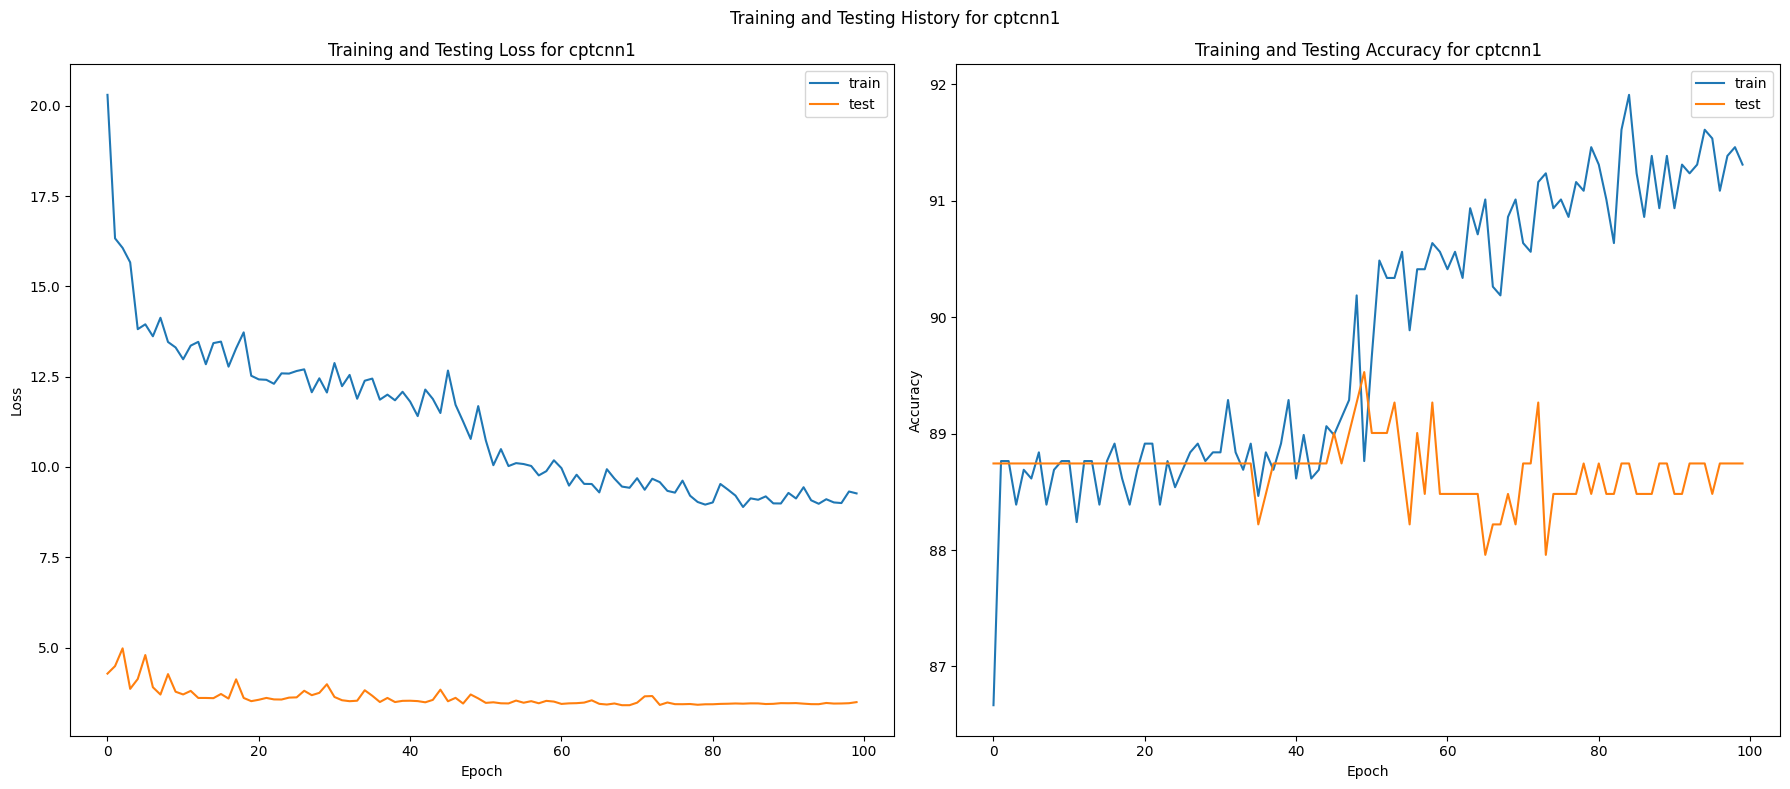

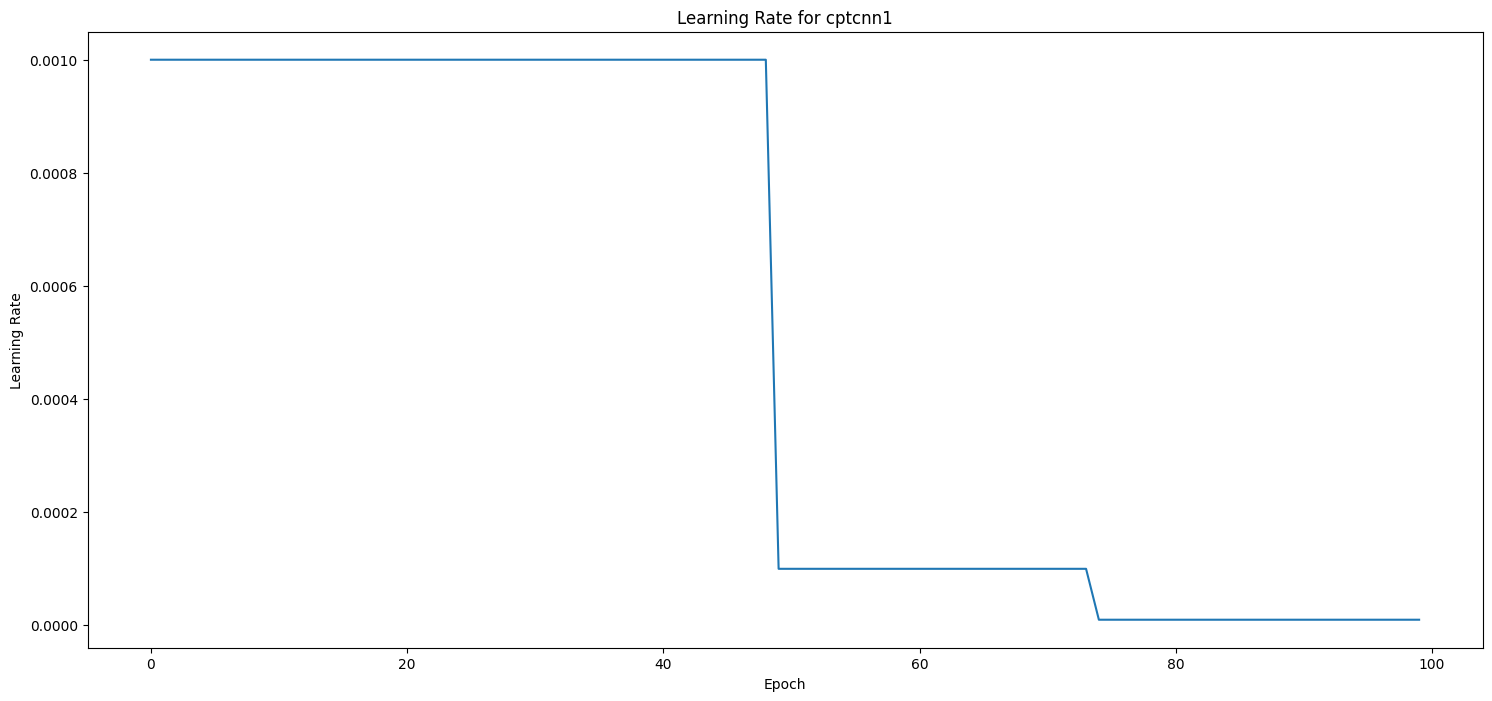

Model cptcnn2 history:


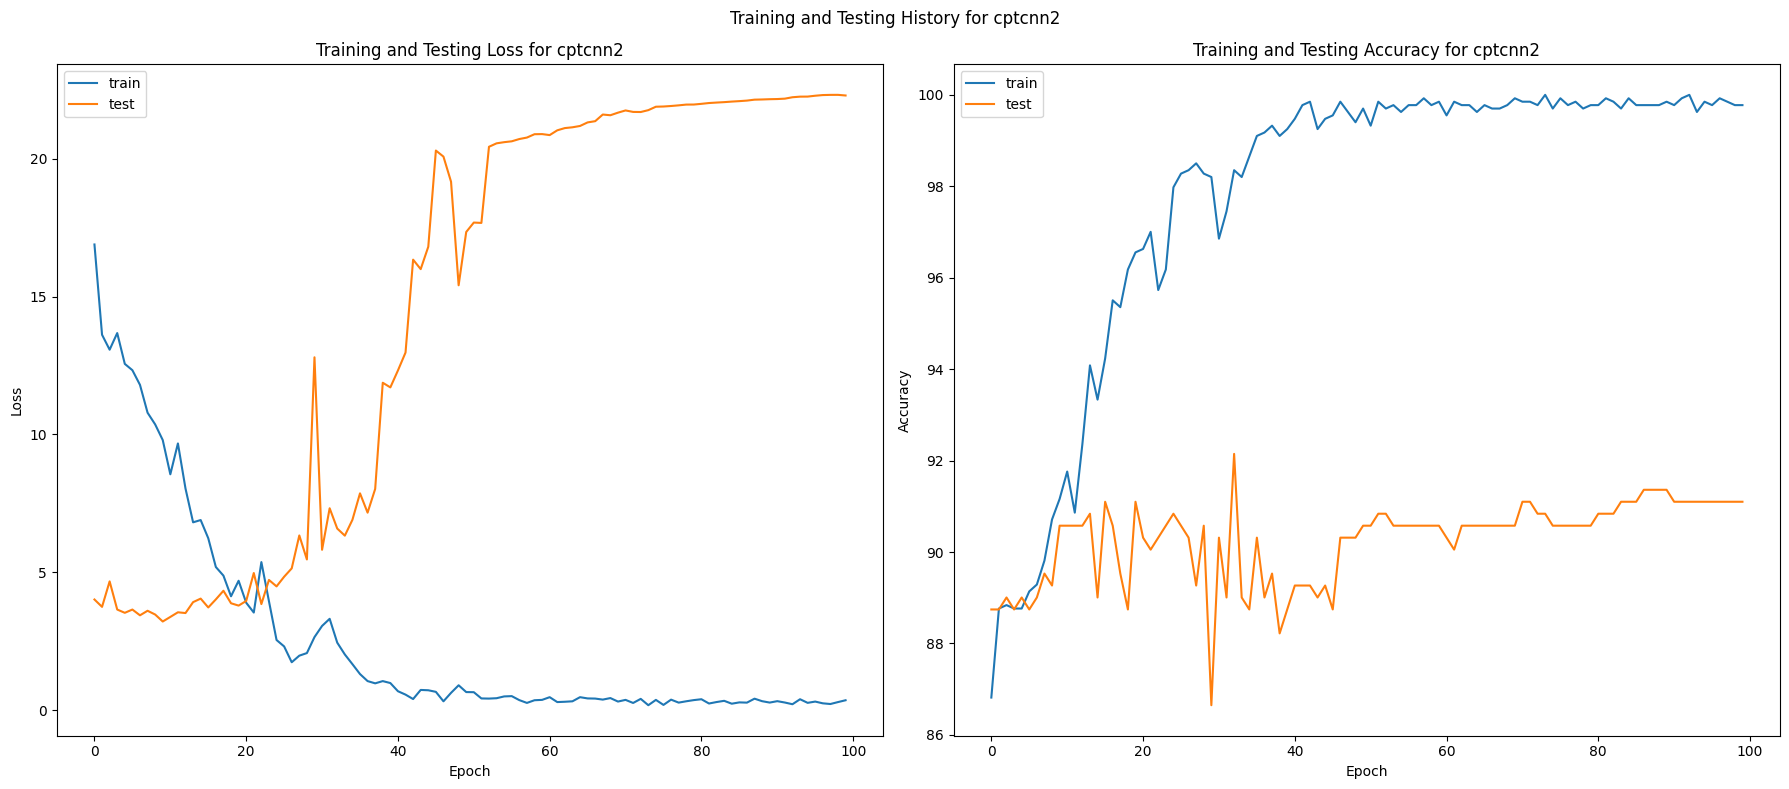

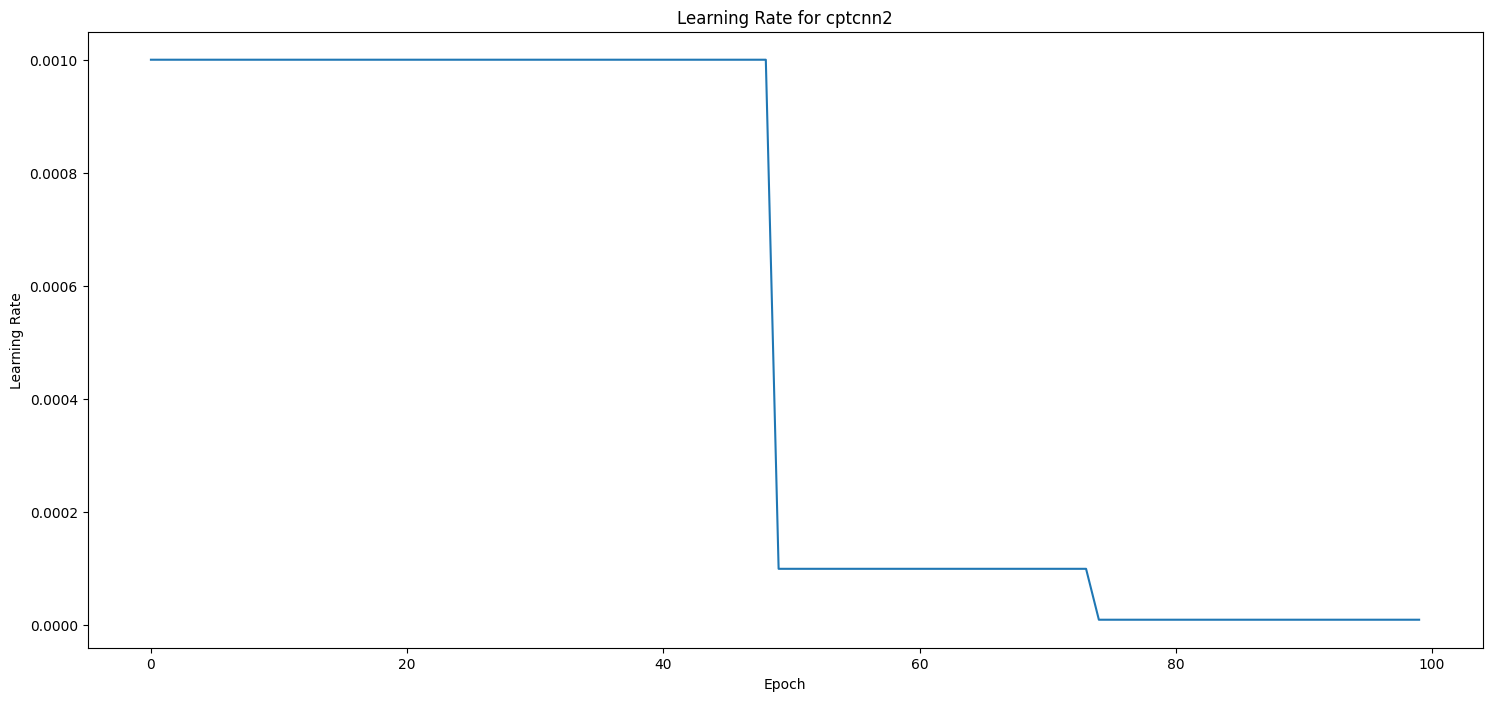

Model cctcnn1 history:


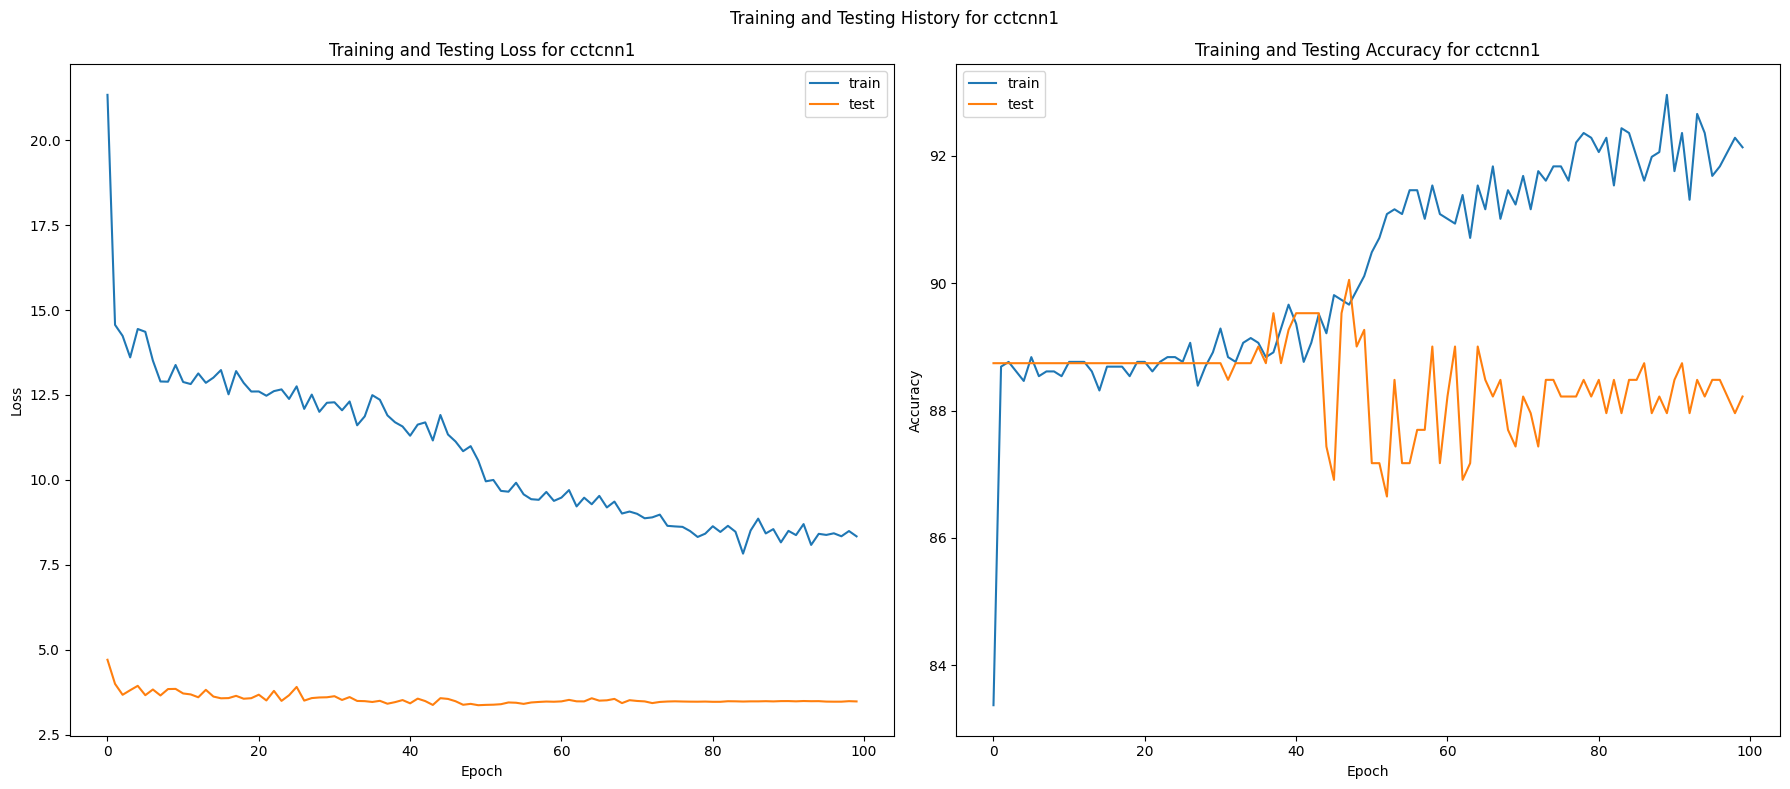

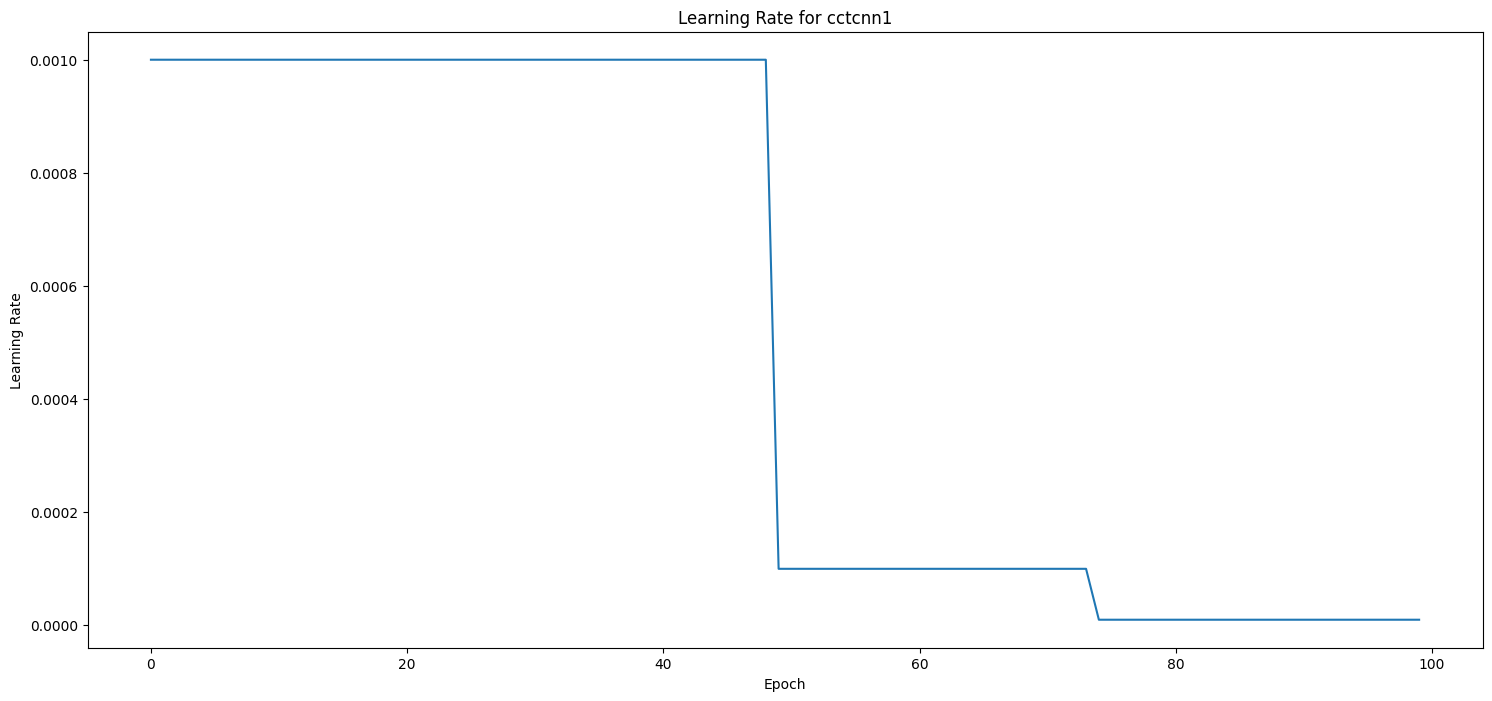

Model cctcnn2 history:


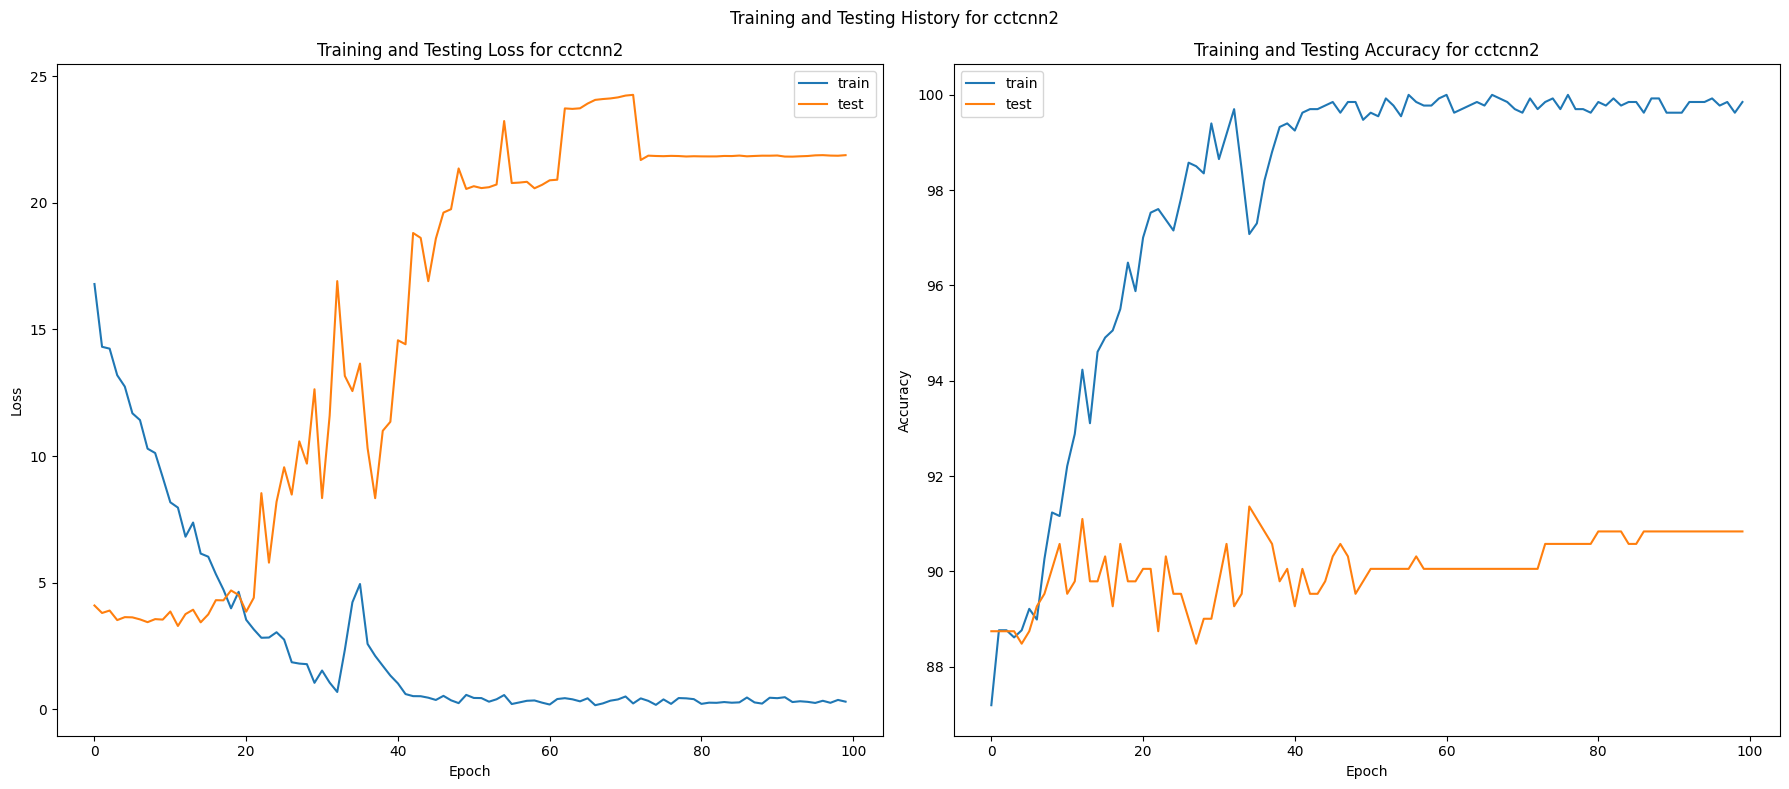

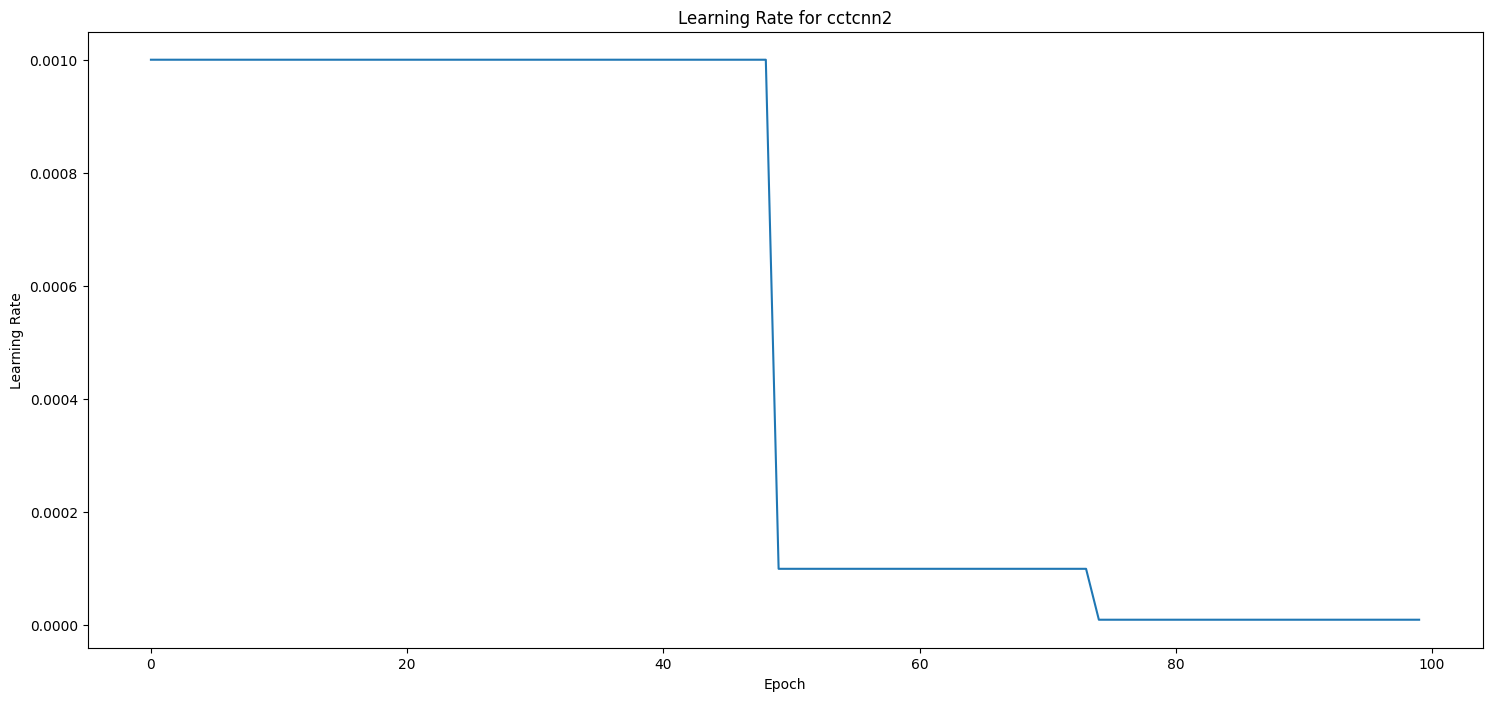

In [10]:
from tcnn.utils.experiment.plot import plot_history

for model_name, history in history_dict.items():
    print(f"Model {model_name} history:")
    plot_history(history, model_name)

In [11]:
import torch

input_shape = (BATCH_SIZE, 1, SIZE, SIZE, SIZE)
input_tensor = torch.randn(input_shape).to(DEVICE)

Evaluating model cptcnn1
Test Accuracy: 339/382 (88.74346%)

Test AUC Score: 0.81601 Precision: 0.50000 Recall: 0.11628 F1: 0.18868
Confusion Matrix: 
 [[334   5]
 [ 38   5]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       339
         1.0       0.50      0.12      0.19        43

    accuracy                           0.89       382
   macro avg       0.70      0.55      0.56       382
weighted avg       0.85      0.89      0.86       382



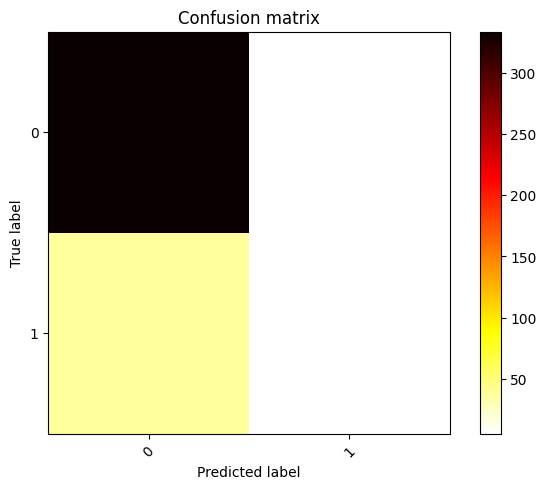

******************************
Evaluating model cptcnn2
Test Accuracy: 348/382 (91.09948%)

Test AUC Score: 0.89024 Precision: 0.59574 Recall: 0.65116 F1: 0.62222
Confusion Matrix: 
 [[320  19]
 [ 15  28]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       339
         1.0       0.60      0.65      0.62        43

    accuracy                           0.91       382
   macro avg       0.78      0.80      0.79       382
weighted avg       0.91      0.91      0.91       382



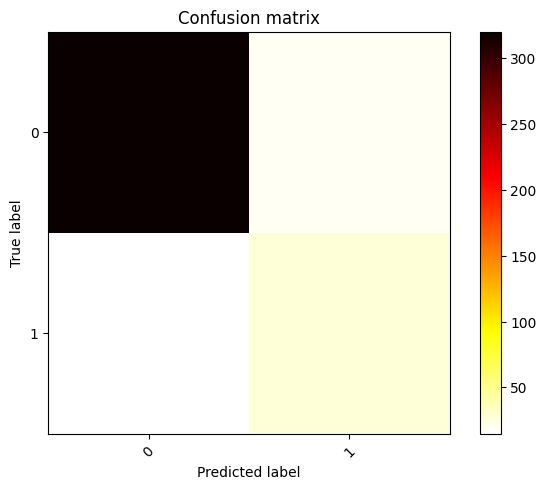

******************************
Evaluating model cctcnn1
Test Accuracy: 337/382 (88.21990%)

Test AUC Score: 0.82054 Precision: 0.41667 Recall: 0.11628 F1: 0.18182
Confusion Matrix: 
 [[332   7]
 [ 38   5]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       339
         1.0       0.42      0.12      0.18        43

    accuracy                           0.88       382
   macro avg       0.66      0.55      0.56       382
weighted avg       0.84      0.88      0.85       382



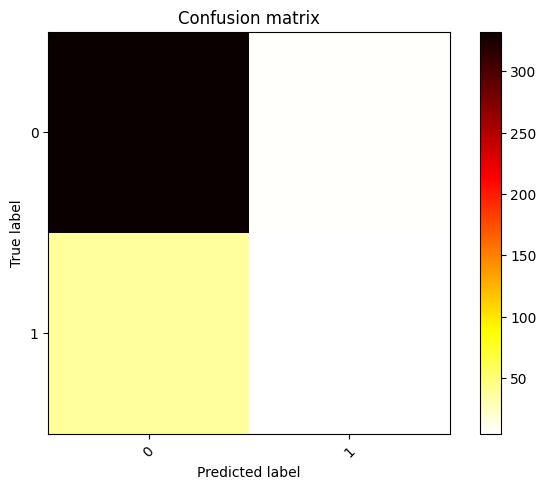

******************************
Evaluating model cctcnn2
Test Accuracy: 347/382 (90.83770%)

Test AUC Score: 0.88067 Precision: 0.60000 Recall: 0.55814 F1: 0.57831
Confusion Matrix: 
 [[323  16]
 [ 19  24]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       339
         1.0       0.60      0.56      0.58        43

    accuracy                           0.91       382
   macro avg       0.77      0.76      0.76       382
weighted avg       0.91      0.91      0.91       382



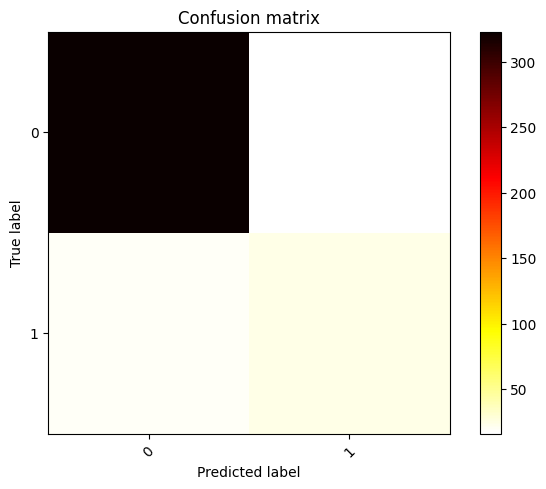

******************************


In [12]:
import torchprofile
from tcnn.utils.experiment.model import count_parameters
from tcnn.utils.experiment.train import eval_model

result = dict()
for model_name, model in model_dict.items():
    print(f"Evaluating model {model_name}")
    result[model_name] = dict()
    result[model_name]["macs"] = torchprofile.profile_macs(model, input_tensor)
    result[model_name]["params"] = count_parameters(model)
    result[model_name]["performance"] = eval_model(model, test_loader, CRITERION, TASK)
    with torch.no_grad():
        torch.cuda.empty_cache()
    print("***" * 10)

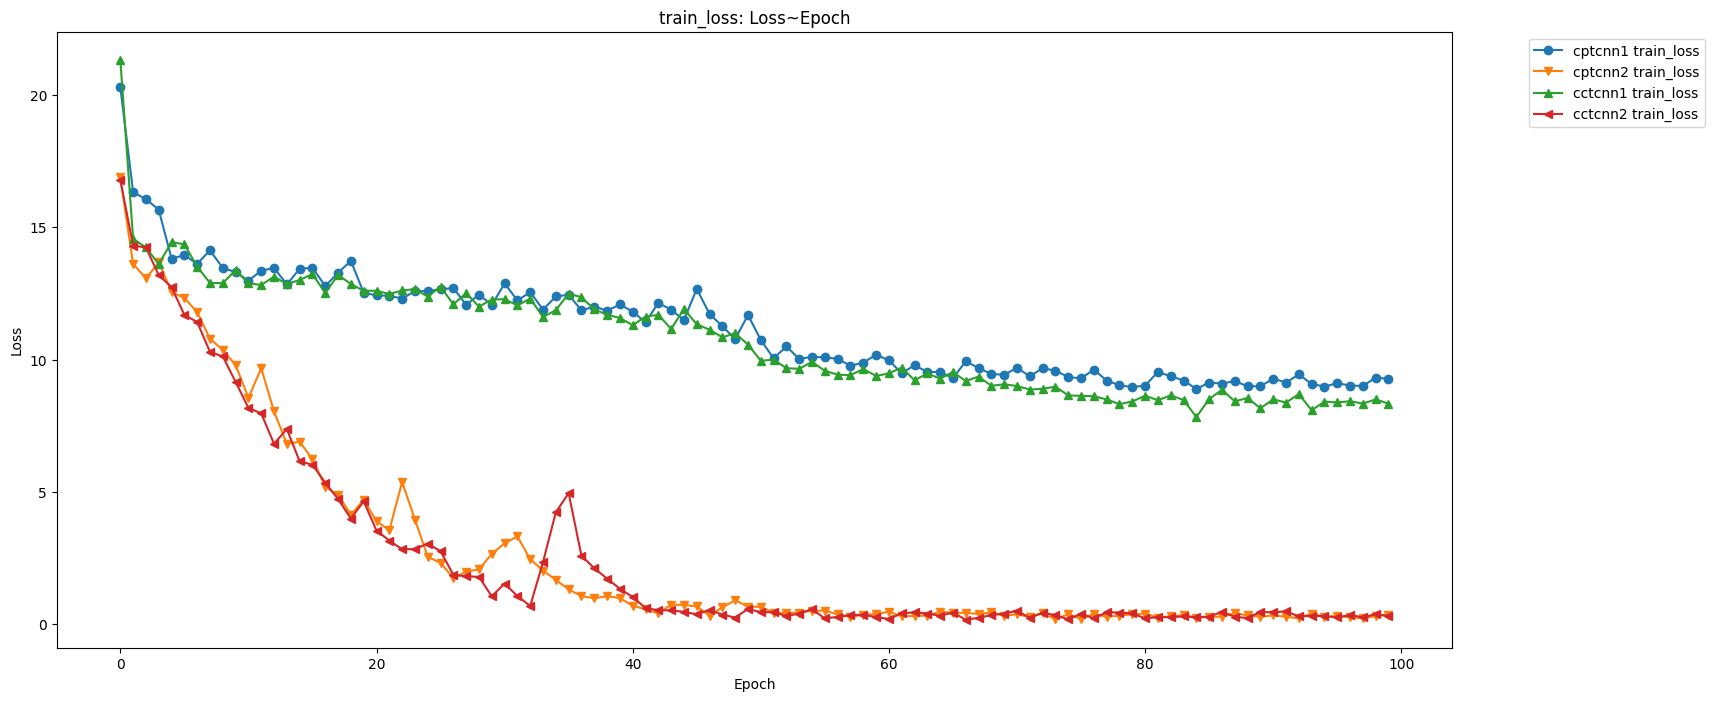

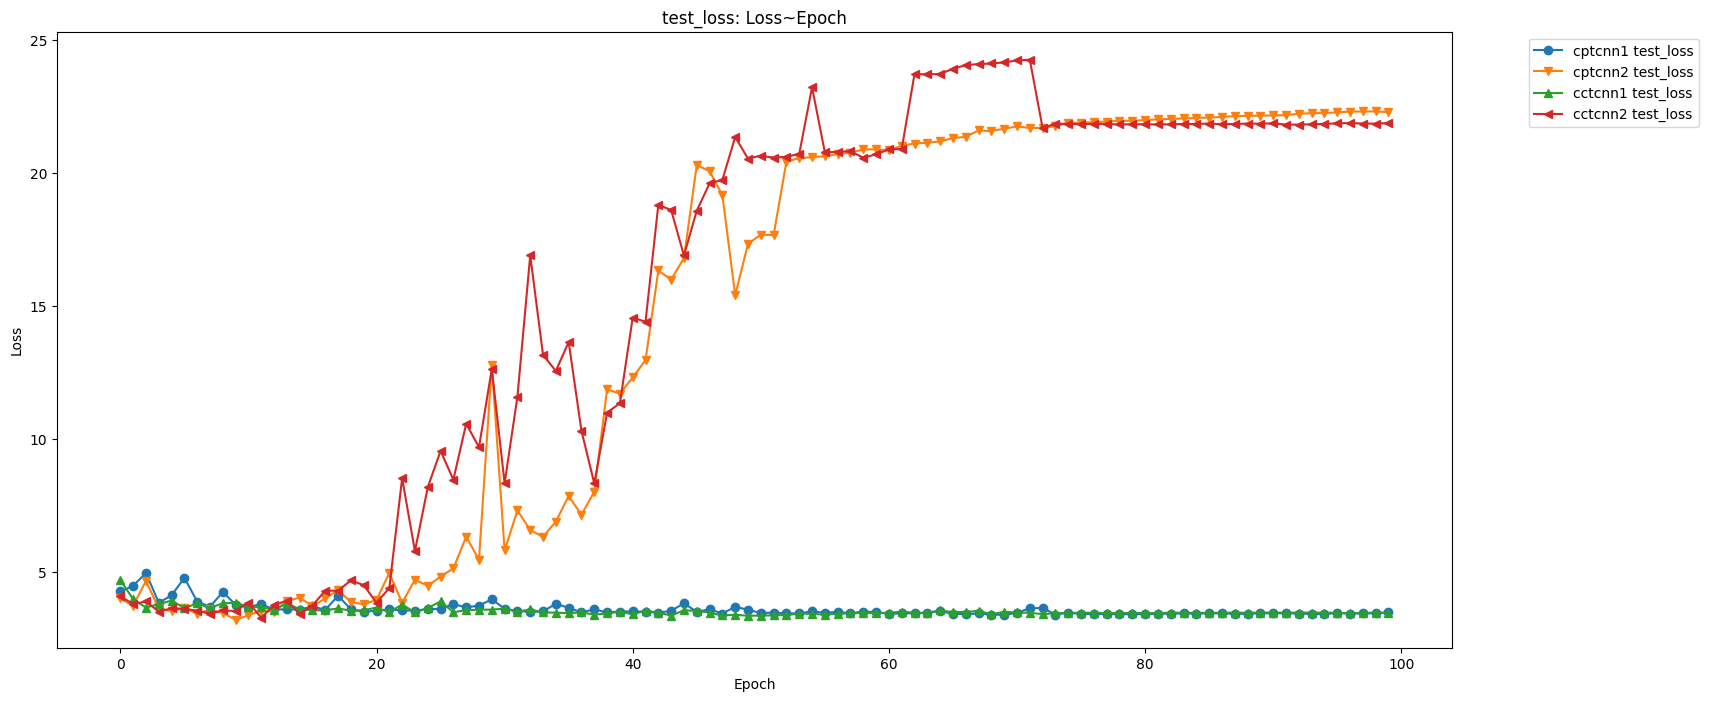

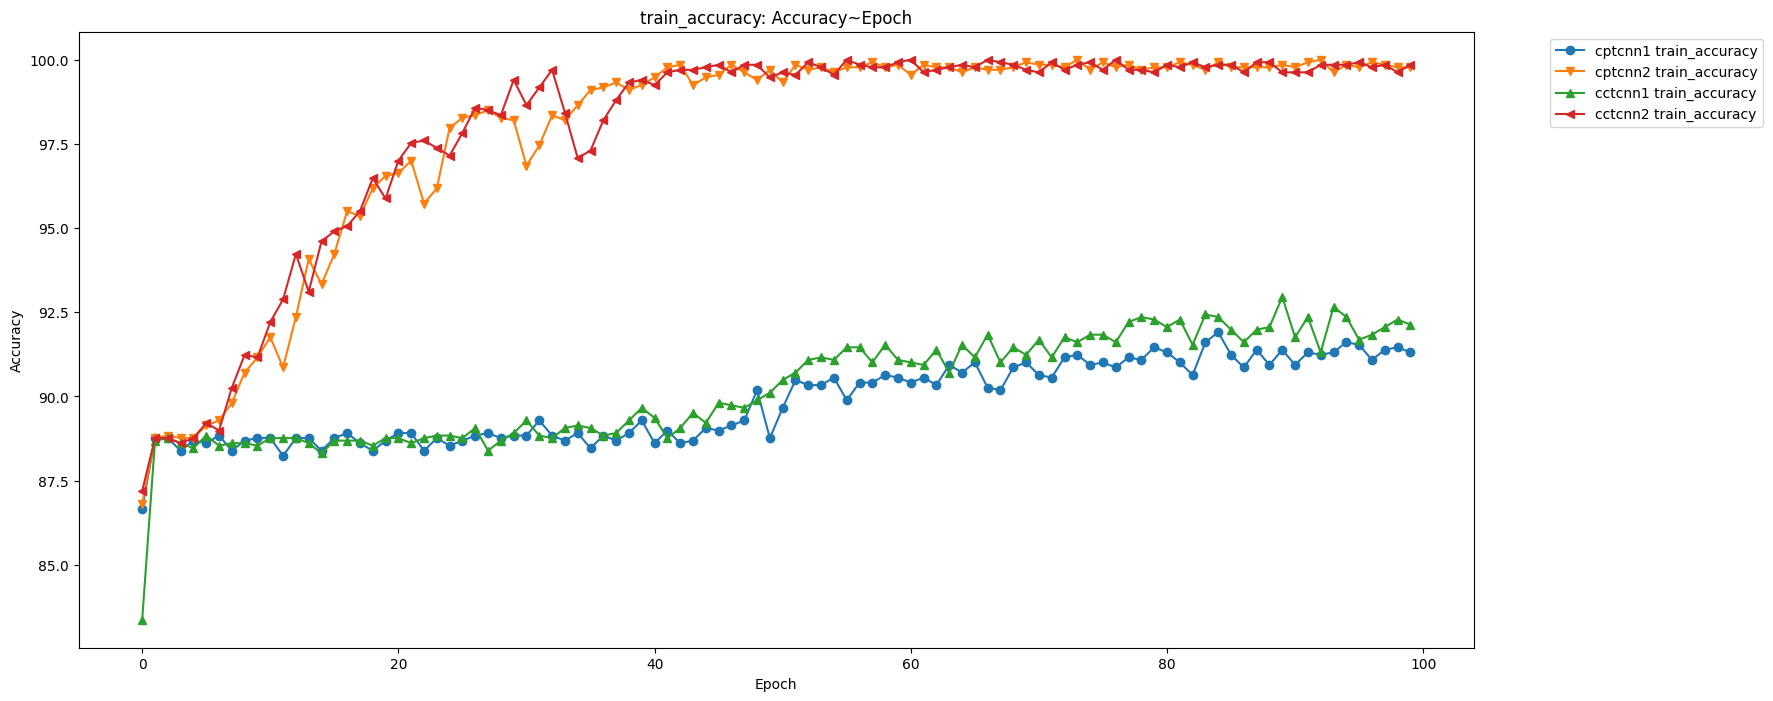

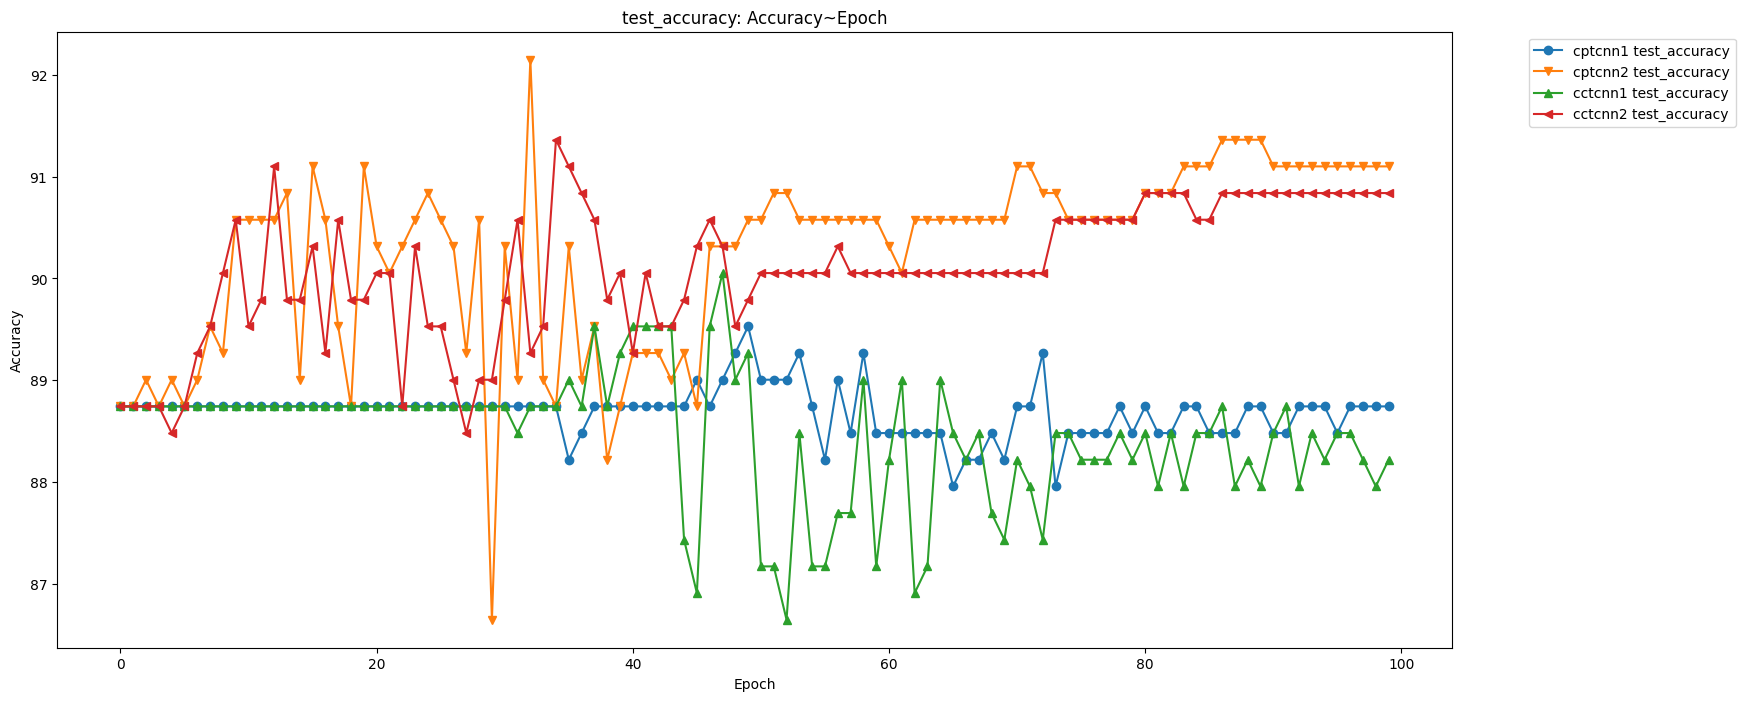

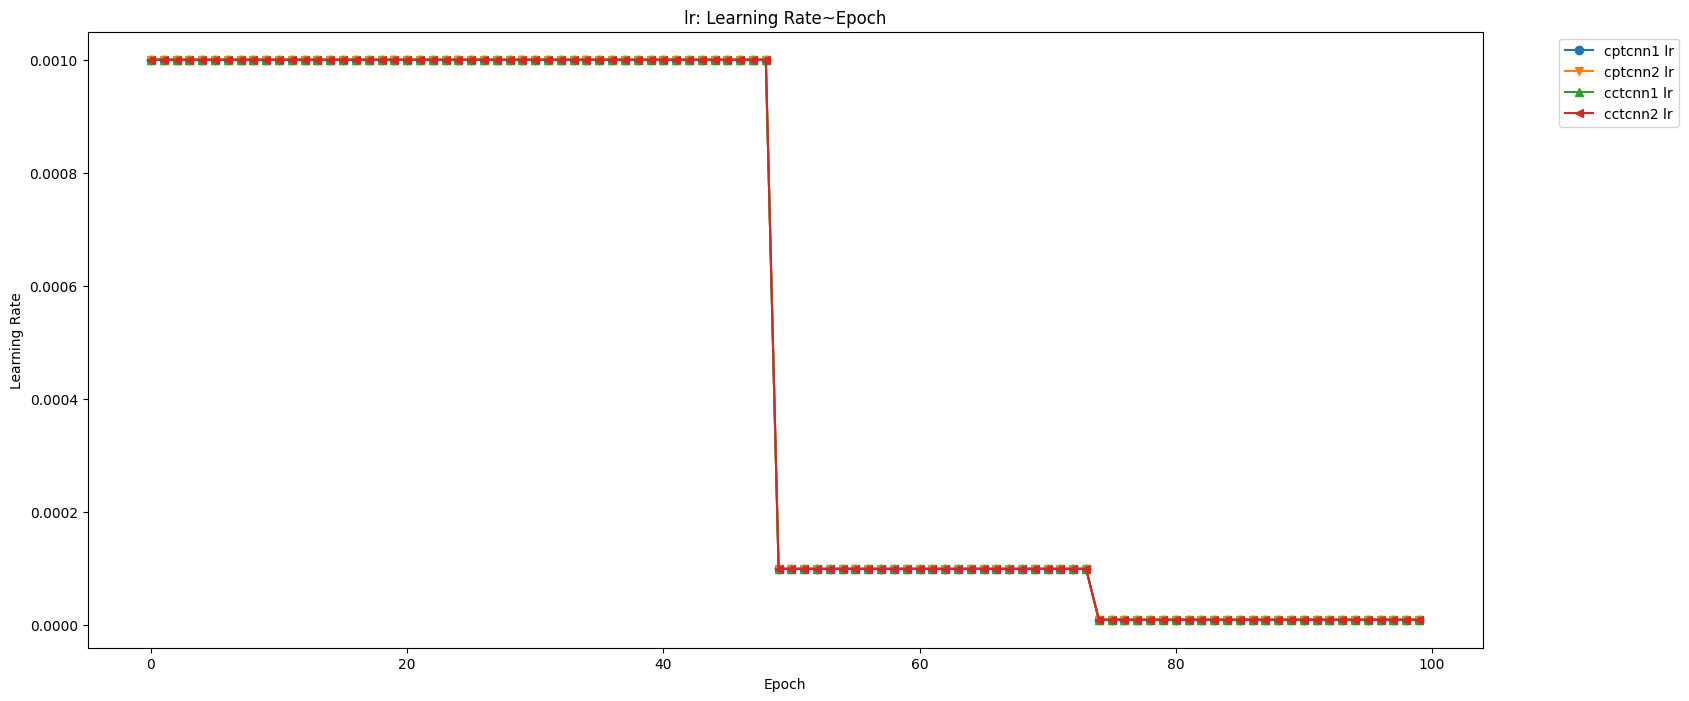

In [13]:
from tcnn.utils.experiment.plot import plot_history_dict

plot_history_dict(history_dict)

Key        Accuracy        AUC             Precision       Recall          F1             
cptcnn1    88.74346        0.81601         0.50000         0.11628         0.18868        
cptcnn2    91.09948        0.89024         0.59574         0.65116         0.62222        
cctcnn1    88.21990        0.82054         0.41667         0.11628         0.18182        
cctcnn2    90.83770        0.88067         0.60000         0.55814         0.57831        


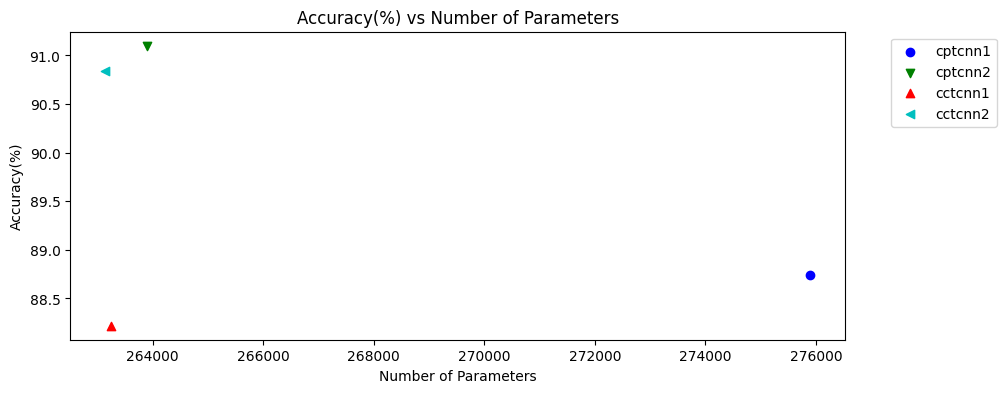

Model                Number of Parameters Accuracy(%)         
cptcnn1              275891               88.7434554973822
cptcnn2              263891               91.09947643979058
cctcnn1              263243               88.21989528795811
cctcnn2              263147               90.83769633507853


In [14]:
from tcnn.utils.experiment.log import show_test_result

show_test_result(result)

In [15]:
with torch.no_grad():
    torch.cuda.empty_cache()